# Prediction Evaluations 

In [1]:
# !pip install termcolor

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows', None)
from termcolor import colored

In [186]:


## data predicted on 22nd Nov.
# preds = pd.read_csv('./Predictions_evals/base_models-2021-12-02 - 12Hours - Evals.csv')
# preds = pd.read_csv('./Predictions_evals/base_models-2021-11-22 - 17Hours - Eval_day3.csv')
preds = pd.read_csv('./Predictions_evals/base_models-2022-02-02 - 17Hours - Evals.csv')
# preds = pd.read_csv('./Predictions_evals/base_models-2022-02-11 - 16Hours - Evals.csv')


## Data predicted on 23rd Nov.
# preds = pd.read_csv('./Predictions_evals/base_models1-2021-11-23 - 18Hours.csv')


In [187]:
# preds.dropna(inplace=True,axis=0)

In [188]:
# acts1 = acts.loc[acts.date == '23-09-2021']

In [189]:
# preds = preds.loc[preds.index<288]

In [190]:
preds.tail()

,station,date,hour,month,year,day,season,part_of_day,predicted_nox,predicted_temperature,predicted_co,predicted_pm25,predicted_aqi,pm25,pm10,nox,temperature,co
595,Velacheri_Res_Area_CPCB,2022-02-06,19:00,February,2022,Sunday,Winter,Night,11.83,26.77,0.71,5.78,good,13.27,24.41,7.29,NaN,0.75
596,Velacheri_Res_Area_CPCB,2022-02-06,20:00,February,2022,Sunday,Winter,Night,12.17,26.40,0.72,6.72,good,15.68,28.29,7.31,NaN,0.79
597,Velacheri_Res_Area_CPCB,2022-02-06,21:00,February,2022,Sunday,Winter,Night,12.18,26.24,0.75,8.70,good,17.42,31.10,7.30,NaN,0.67
598,Velacheri_Res_Area_CPCB,2022-02-06,22:00,February,2022,Sunday,Winter,Night,12.13,26.12,0.76,9.55,good,16.91,30.28,7.26,NaN,0.69
599,Velacheri_Res_Area_CPCB,2022-02-06,23:00,February,2022,Sunday,Winter,Night,11.34,25.79,0.75,9.48,good,16.37,29.39,7.19,NaN,0.83


In [191]:
preds.station.value_counts()

Kodungaiyur_Chennai_TNPCB         120
Royapuram_Chennai_TNPCB           120
Perungudi_Chennai_TNPCB           120
Alandur_Bus_Depot_Chennai_CPCB    120
Velacheri_Res_Area_CPCB           120
Name: station, dtype: int64

In [192]:
len(preds)

600

In [193]:
iqa = []
for i in preds.pm25:
    if i < 31:
        iqa.append('good')
    elif i >=31 and i < 61:
        iqa.append('satisfactory')
    elif i >= 61 and i < 91:
        iqa.append('moderate')
    elif i >= 91 and i < 121:
        iqa.append('poor')
    elif i >= 121 and i < 251:
        iqa.append('very poor')
    elif i >= 251:
        iqa.append('severe')
    else:
        iqa.append('nan')
preds['actual_aqi'] = iqa

In [194]:
preds1 = preds[['predicted_pm25','pm25','predicted_aqi','actual_aqi']]
preds1.head()

,predicted_pm25,pm25,predicted_aqi,actual_aqi
0,30.56,NaN,good,nan
1,31.05,NaN,satisfactory,nan
2,32.78,NaN,satisfactory,nan
3,35.56,NaN,satisfactory,nan
4,39.78,NaN,satisfactory,nan


In [195]:
# preds1.dropna(inplace=True,axis=0)

In [196]:
# preds1

In [197]:
# len(preds.loc[preds.Results == 1])/len(preds)

In [198]:
preds2 = preds1.loc[preds1.actual_aqi != 'nan']
preds2.head()

,predicted_pm25,pm25,predicted_aqi,actual_aqi
120,22.99,13.75,good,good
121,23.14,19.25,good,good
122,25.09,30.75,good,good
123,27.86,42.75,good,satisfactory
124,31.28,63.00,satisfactory,moderate


In [199]:
rs = []
for i,j in zip(preds2.predicted_aqi,preds2.actual_aqi):
    if i == j:
        rs.append(1)
    else:
        rs.append(0)

In [200]:
preds2['Results'] = rs

In [201]:
print(preds2.Results.value_counts())

1    388
0     92
Name: Results, dtype: int64


In [202]:
results = round(len(preds2.loc[preds2.Results == 1])/len(preds2),2)*100

In [203]:
print(colored('Prediction Accuracy : '+str(results),attrs=['bold'],color='green'),'%')

Prediction Accuracy : 81.0 %


In [204]:
# rsu_fin = []
# for i in preds.index:
#     if preds.actual_aqi[i] == 'nan':
#         rsu_fin.append(1)
#     elif preds.predicted_aqi[i] == preds.actual_aqi[i]:
#         rsu_fin.append(1)
#     else:
#         rsu_fin.append(0)
# preds['Results'] = rsu_fin

# # print(colored('Prediction Results for predictions made on 9th september (8th sep to 12th sep) : '+str((len(preds.Results.loc[preds.Results == 1])/len(preds))*100),attrs=['bold'],color='green'),'%')

# ##
# pred_res = round(len(preds.Results.loc[preds.Results == 1])/len(preds)*100,2)
# print(colored('Prediction Accuracy : '+str(pred_res),attrs=['bold'],color='green'),'%')
# #print('Accuracy : ',pred_res)


In [205]:
preds2.actual_aqi.value_counts()

good            373
satisfactory     93
moderate         13
poor              1
Name: actual_aqi, dtype: int64

In [206]:
preds2.predicted_aqi.value_counts()

good            355
satisfactory    123
moderate          2
Name: predicted_aqi, dtype: int64

# Plots of entire prediction data (inc of all stations)

In [207]:
alan = preds.loc[preds.station == 'Alandur_Bus_Depot_Chennai_CPCB']
kod = preds.loc[preds.station == 'Kodungaiyur_Chennai_TNPCB']
per = preds.loc[preds.station == 'Perungudi_Chennai_TNPCB']
vel = preds.loc[preds.station == 'Velacheri_Res_Area_CPCB']
roy = preds.loc[preds.station == 'Royapuram_Chennai_TNPCB']

# CO evaluations

In [208]:
print('The range of CO lies between :',preds.co.min(),' to ',preds.co.max())
print('Avg CO : ',round(preds.co.mean(),2))

The range of CO lies between : 0.02  to  4.63
Avg CO :  0.88


In [209]:
eval_date_mean = preds[['co','predicted_co']].groupby(preds.date).mean()
eval_pod_mean = preds[['co','predicted_co']].groupby(preds.part_of_day).mean()
eval_hour_mean = preds[['co','predicted_co']].groupby(preds.hour).mean()

In [210]:
from sklearn.metrics import r2_score,mean_squared_error

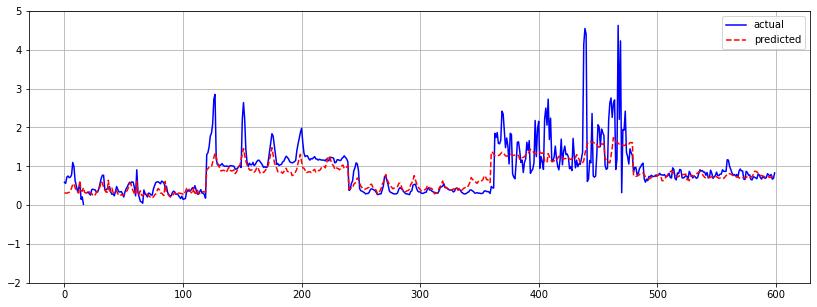




                     co  predicted_co
part_of_day                          
Afternoon      0.831400      0.768900
Early-Morning  1.036133      0.806667
Evening        0.802877      0.768933
Mid-Night      0.777300      0.699400
Morning        1.035600      0.872800
Night          0.808880      0.756960


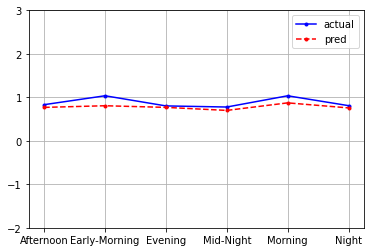

CO RMSE : 0.12448647214907782


In [211]:
plt.figure(figsize=(14,5))
plt.plot(preds.index,preds.co,label='actual',color='b',linestyle='-')
plt.plot(preds.index,preds.predicted_co,label='predicted',color='r',linestyle='--')
plt.legend()
plt.yticks(np.arange(-2,6,1))
plt.grid()
plt.show()

print('\n\n')

plt.plot(eval_pod_mean.index,eval_pod_mean.co,marker='.',label='actual',color='b',linestyle='-')
plt.plot(eval_pod_mean.index,eval_pod_mean.predicted_co,marker='.',label='pred',color='r',linestyle='--')
print(eval_pod_mean)
plt.legend()
plt.grid()
plt.yticks(np.arange(-2,4,1))
plt.show()
try :
    print('CO RMSE :', np.sqrt(mean_squared_error(eval_pod_mean.co,eval_pod_mean.predicted_co))) 
except :
    print('Null values are present. ')

In [212]:
eval_date_mean = alan[['co','predicted_co']].groupby(alan.date).mean()
eval_pod_mean = alan[['co','predicted_co']].groupby(alan.part_of_day).mean()
eval_hour_mean = alan[['co','predicted_co']].groupby(alan.hour).mean()

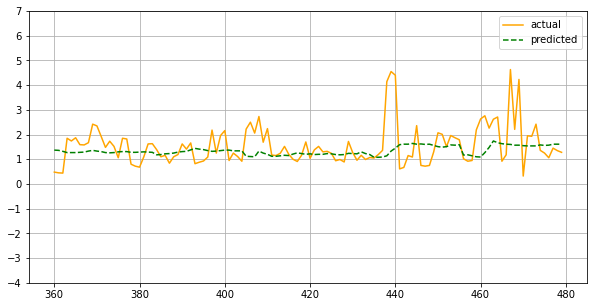

                     co  predicted_co
part_of_day                          
Afternoon      1.557000      1.398000
Early-Morning  1.824000      1.216000
Evening        1.477333      1.397333
Mid-Night      1.244500      1.221500
Morning        1.802000      1.418000
Night          1.436800      1.368400

CO RMSE : 0.30386635220109504


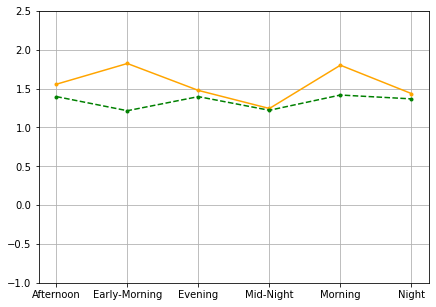

          co  predicted_co
hour                      
00:00  1.356         1.270
01:00  1.030         1.242
02:00  1.172         1.214
03:00  1.420         1.160
04:00  1.562         1.162
05:00  1.684         1.212
06:00  2.226         1.274
07:00  2.272         1.366
08:00  2.288         1.408
09:00  1.136         1.456
10:00  1.248         1.438
11:00  2.066         1.422
12:00  1.382         1.410
13:00  2.376         1.390
14:00  1.072         1.394
15:00  1.398         1.398
16:00  1.602         1.412
17:00  1.546         1.400
18:00  1.284         1.380
19:00  1.216         1.370
20:00  1.012         1.380
21:00  1.690         1.370
22:00  1.722         1.362
23:00  1.544         1.360

CO RMSE : 0.4622209067823162


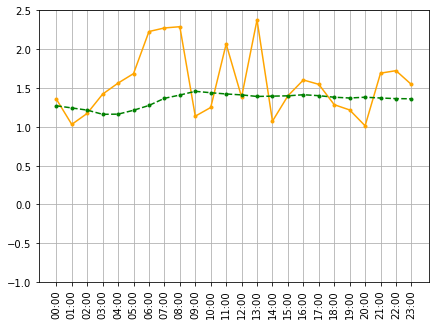

In [213]:

# ### Alandur
plt.figure(figsize=(10,5))
plt.plot(alan.index,alan.co,label='actual',color='orange',linestyle='-')
plt.plot(alan.index,alan.predicted_co,label='predicted',color='g',linestyle='--')
plt.legend()
plt.grid()
plt.yticks(np.arange(-4,8,1))
plt.show()

plt.figure(figsize=(7,5))
plt.plot(eval_pod_mean.index,eval_pod_mean.co,marker='.',color='orange',linestyle='-')
plt.plot(eval_pod_mean.index,eval_pod_mean.predicted_co,marker='.',color='g',linestyle='--')
print(eval_pod_mean)
try:
    print('\nCO RMSE :', np.sqrt(mean_squared_error(eval_pod_mean.co,eval_pod_mean.predicted_co)))
except:    
    print('Null values are present. ')
plt.grid()
plt.yticks(np.arange(-1,3,0.5))
plt.show()

plt.figure(figsize=(7,5))
plt.plot(eval_hour_mean.index,eval_hour_mean.co,marker='.',color='orange',linestyle='-')
plt.plot(eval_hour_mean.index,eval_hour_mean.predicted_co,marker='.',color='g',linestyle='--')
print(eval_hour_mean)
try:
    print('\nCO RMSE :', np.sqrt(mean_squared_error(eval_hour_mean.co,eval_hour_mean.predicted_co)))
except:    
    print('Null values are present. ')
plt.xticks(rotation=90)
plt.yticks(np.arange(-1,3,0.5))
plt.grid()
plt.show()


## Perungudi

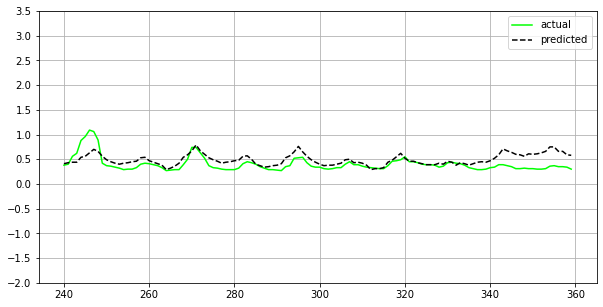

                     co  predicted_co
part_of_day                          
Afternoon      0.325500      0.446500
Early-Morning  0.544000      0.555333
Evening        0.347333      0.505333
Mid-Night      0.334000      0.380000
Morning        0.479600      0.581600
Night          0.379600      0.474800

CO RMSE for perungudi: 0.10109111768139707


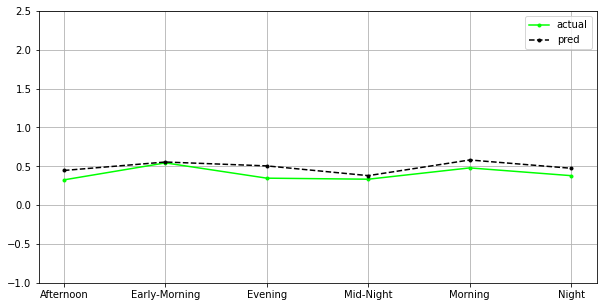

          co  predicted_co
hour                      
00:00  0.316         0.350
01:00  0.316         0.374
02:00  0.346         0.388
03:00  0.358         0.408
04:00  0.464         0.504
05:00  0.526         0.544
06:00  0.642         0.618
07:00  0.642         0.716
08:00  0.596         0.634
09:00  0.434         0.564
10:00  0.372         0.514
11:00  0.354         0.480
12:00  0.344         0.450
13:00  0.326         0.438
14:00  0.316         0.446
15:00  0.316         0.452
16:00  0.312         0.474
17:00  0.330         0.484
18:00  0.400         0.558
19:00  0.426         0.560
20:00  0.400         0.488
21:00  0.388         0.474
22:00  0.360         0.440
23:00  0.324         0.412

CO RMSE for perungudi: 0.10256786371308836


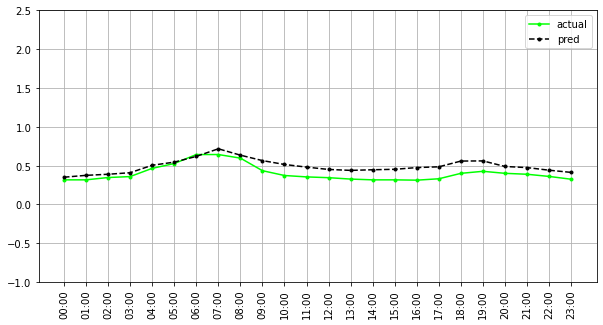

In [214]:
# ### Perungudi
eval_pod_mean = per[['co','predicted_co']].groupby(per.part_of_day).mean()
eval_hour_mean = per[['co','predicted_co']].groupby(per.hour).mean()

plt.figure(figsize=(10,5))
plt.plot(per.index,per.co,label='actual',color='lime',linestyle='-')
plt.plot(per.index,per.predicted_co,label='predicted',color='k',linestyle='--')
plt.legend()
plt.grid()
plt.yticks(np.arange(-2,4,0.5))
plt.show()

plt.figure(figsize=(10,5))
plt.plot(eval_pod_mean.index,eval_pod_mean.co,marker='.',label='actual',color='lime',linestyle='-')
plt.plot(eval_pod_mean.index,eval_pod_mean.predicted_co,marker='.',label='pred',color='k',linestyle='--')
print(eval_pod_mean)
try:
    print('\nCO RMSE for perungudi:', np.sqrt(mean_squared_error(eval_pod_mean.co,eval_pod_mean.predicted_co)))
except:    
    print('\nRMSE cannot be calculated as Null values are present. ')
plt.yticks(np.arange(-1,3,0.5))
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(10,5))
plt.plot(eval_hour_mean.index,eval_hour_mean.co,marker='.',label='actual',color='lime',linestyle='-')
plt.plot(eval_hour_mean.index,eval_hour_mean.predicted_co,marker='.',label='pred',color='k',linestyle='--')
plt.legend()
print(eval_hour_mean)
try:
    print('\nCO RMSE for perungudi:', np.sqrt(mean_squared_error(eval_hour_mean.co,eval_hour_mean.predicted_co)))
except:    
    print('\nRMSE cannot be calculated as Null values are present. ')
plt.yticks(np.arange(-1,3,0.5))
plt.xticks(rotation=90)
plt.grid()
plt.show()


## Kodungaiyur

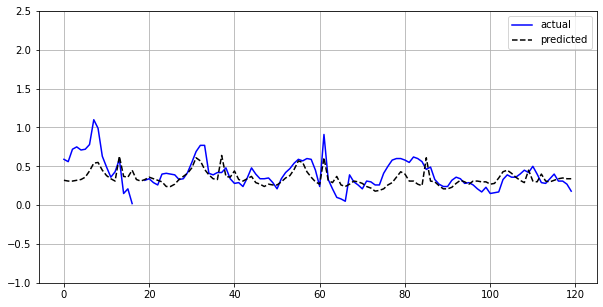

                     co  predicted_co
part_of_day                          
Afternoon      0.417000      0.384000
Early-Morning  0.474000      0.359333
Evening        0.209231      0.314667
Mid-Night      0.372000      0.272500
Morning        0.567600      0.421200
Night          0.322000      0.306000

CO RMSE for Kodungaiyur: 0.09741952483336996


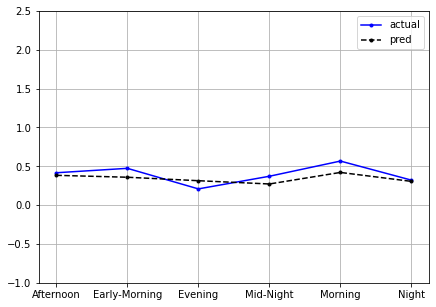

           co  predicted_co
hour                       
00:00  0.3820         0.272
01:00  0.3440         0.260
02:00  0.3500         0.266
03:00  0.4120         0.292
04:00  0.4240         0.316
05:00  0.4700         0.344
06:00  0.5280         0.418
07:00  0.6620         0.516
08:00  0.6600         0.504
09:00  0.5820         0.412
10:00  0.4940         0.360
11:00  0.4400         0.314
12:00  0.4200         0.290
13:00  0.5600         0.588
14:00  0.3900         0.336
15:00  0.2980         0.322
16:00  0.1920         0.382
17:00  0.2225         0.288
18:00  0.2175         0.274
19:00  0.3560         0.298
20:00  0.3580         0.332
21:00  0.3200         0.320
22:00  0.2720         0.302
23:00  0.3040         0.278

CO RMSE for Kodungaiyur: 0.10388505266238579


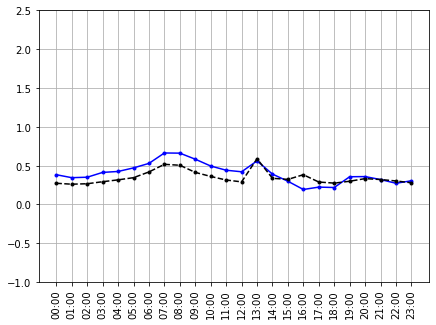

In [215]:
# ### Kodungaiyur

eval_pod_mean = kod[['co','predicted_co']].groupby(kod.part_of_day).mean()
eval_hour_mean = kod[['co','predicted_co']].groupby(kod.hour).mean()

plt.figure(figsize=(10,5))
plt.plot(kod.index,kod.co,label='actual',color='blue',linestyle='-')
plt.plot(kod.index,kod.predicted_co,label='predicted',color='k',linestyle='--')
plt.legend()
plt.yticks(np.arange(-1,3,0.5))
plt.grid()
plt.show()

plt.figure(figsize=(7,5))
plt.plot(eval_pod_mean.index,eval_pod_mean.co,marker='.',label='actual',color='blue',linestyle='-')
plt.plot(eval_pod_mean.index,eval_pod_mean.predicted_co,marker='.',label='pred',color='k',linestyle='--')
plt.yticks(np.arange(-1,3,0.5))
plt.legend()
plt.grid()
print(eval_pod_mean)
try:
    print('\nCO RMSE for Kodungaiyur:', np.sqrt(mean_squared_error(eval_pod_mean.co,eval_pod_mean.predicted_co)))
except:    
    print('\nRMSE cannot be calculated as Null values are present. ')
plt.show()

plt.figure(figsize=(7,5))
plt.plot(eval_hour_mean.index,eval_hour_mean.co,marker='.',color='blue',linestyle='-')
plt.plot(eval_hour_mean.index,eval_hour_mean.predicted_co,marker='.',color='k',linestyle='--')
print(eval_hour_mean)
try:
    print('\nCO RMSE for Kodungaiyur:', np.sqrt(mean_squared_error(eval_hour_mean.co,eval_hour_mean.predicted_co)))
except:    
    print('\nRMSE cannot be calculated as Null values are present. ')
plt.yticks(np.arange(-1,3,0.5))
plt.grid()
plt.xticks(rotation=90)
plt.show()


## Velacheri


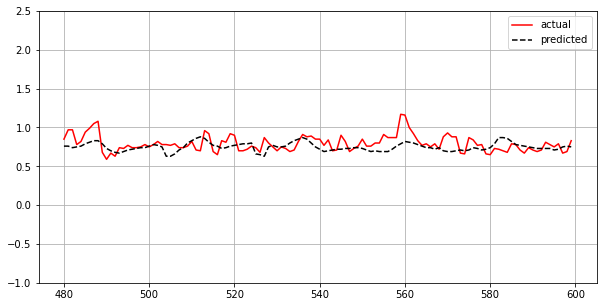

                   co  predicted_co
part_of_day                        
Afternoon      0.7575      0.725000
Early-Morning  0.7940      0.779333
Evening        0.7860      0.734667
Mid-Night      0.7985      0.716500
Morning        0.8456      0.811200
Night          0.7664      0.727200

CO RMSE for Velacheri: 0.047170739910496445


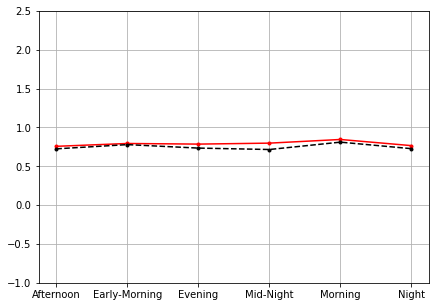

          co  predicted_co
hour                      
00:00  0.806         0.714
01:00  0.812         0.718
02:00  0.808         0.710
03:00  0.768         0.724
04:00  0.762         0.738
05:00  0.798         0.780
06:00  0.822         0.820
07:00  0.890         0.840
08:00  0.906         0.852
09:00  0.862         0.826
10:00  0.820         0.784
11:00  0.750         0.754
12:00  0.714         0.736
13:00  0.774         0.716
14:00  0.768         0.722
15:00  0.774         0.726
16:00  0.756         0.736
17:00  0.806         0.732
18:00  0.796         0.736
19:00  0.764         0.732
20:00  0.782         0.744
21:00  0.724         0.728
22:00  0.740         0.722
23:00  0.822         0.710

CO RMSE for Velacheri: 0.054338445567265456


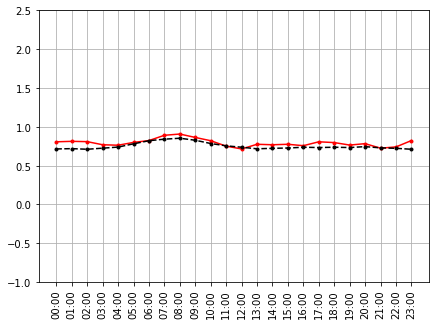

In [216]:
### Velacheri

eval_pod_mean = vel[['co','predicted_co']].groupby(vel.part_of_day).mean()
eval_hour_mean = vel[['co','predicted_co']].groupby(vel.hour).mean()

plt.figure(figsize=(10,5))
plt.plot(vel.index,vel.co,label='actual',color='r',linestyle='-')
plt.plot(vel.index,vel.predicted_co,label='predicted',color='k',linestyle='--')
plt.legend()
plt.yticks(np.arange(-1,3,0.5))
plt.grid()
plt.show()


plt.figure(figsize=(7,5))
plt.plot(eval_pod_mean.index,eval_pod_mean.co,marker='.',color='r',linestyle='-')
plt.plot(eval_pod_mean.index,eval_pod_mean.predicted_co,marker='.',color='k',linestyle='--')
print(eval_pod_mean)
plt.yticks(np.arange(-1,3,0.5))
try:
    print('\nCO RMSE for Velacheri:', np.sqrt(mean_squared_error(eval_pod_mean.co,eval_pod_mean.predicted_co)))
except:    
    print('\nRMSE cannot be calculated as Null values are present. ')
plt.grid()
plt.show()

plt.figure(figsize=(7,5))
plt.plot(eval_hour_mean.index,eval_hour_mean.co,marker='.',color='r',linestyle='-')
plt.plot(eval_hour_mean.index,eval_hour_mean.predicted_co,marker='.',color='k',linestyle='--')
print(eval_hour_mean)
plt.yticks(np.arange(-1,3,0.5))
plt.grid()
plt.xticks(rotation=90)
try:
    print('\nCO RMSE for Velacheri:', np.sqrt(mean_squared_error(eval_hour_mean.co,eval_hour_mean.predicted_co)))
except:    
    print('\nRMSE cannot be calculated as Null values are present. ')
plt.show()


## Royapuram

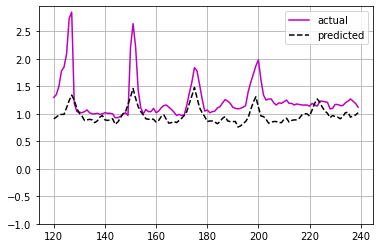

                     co  predicted_co
part_of_day                          
Afternoon      1.100000      0.891000
Early-Morning  1.544667      1.123333
Evening        1.115333      0.892667
Mid-Night      1.137500      0.906500
Morning        1.483200      1.132000
Night          1.139600      0.908400

CO RMSE for Royapuram: 0.28894610288143757


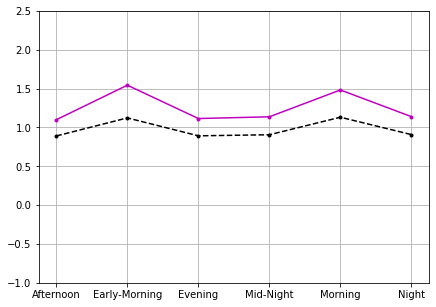

          co  predicted_co
hour                      
00:00  1.092         0.848
01:00  1.106         0.886
02:00  1.140         0.928
03:00  1.212         0.964
04:00  1.314         0.990
05:00  1.440         1.124
06:00  1.880         1.256
07:00  2.068         1.372
08:00  1.678         1.230
09:00  1.370         1.084
10:00  1.194         1.014
11:00  1.106         0.960
12:00  1.110         0.882
13:00  1.100         0.896
14:00  1.094         0.898
15:00  1.096         0.888
16:00  1.096         0.852
17:00  1.106         0.880
18:00  1.144         0.946
19:00  1.178         0.970
20:00  1.174         0.890
21:00  1.148         0.882
22:00  1.112         0.892
23:00  1.086         0.908

CO RMSE for royapuram: 0.3047594679962107


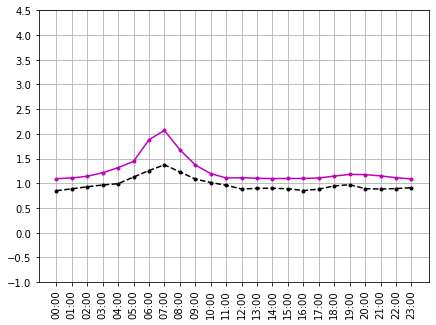

In [217]:
# ## Royapuram

eval_pod_mean = roy[['co','predicted_co']].groupby(roy.part_of_day).mean()
eval_hour_mean = roy[['co','predicted_co']].groupby(roy.hour).mean()


plt.plot(roy.index,roy.co,label='actual',color='m',linestyle='-')
plt.plot(roy.index,roy.predicted_co,label='predicted',color='k',linestyle='--')
plt.legend()
plt.grid()
plt.yticks(np.arange(-1,3,0.5))
plt.show()

plt.figure(figsize=(7,5))
plt.plot(eval_pod_mean.index,eval_pod_mean.co,marker='.',color='m',linestyle='-')
plt.plot(eval_pod_mean.index,eval_pod_mean.predicted_co,marker='.',color='k',linestyle='--')
print(eval_pod_mean)
plt.grid()
try:
    print('\nCO RMSE for Royapuram:', np.sqrt(mean_squared_error(eval_pod_mean.co,eval_pod_mean.predicted_co)))
except:    
    print('\nRMSE cannot be calculated as Null values are present. ')
plt.yticks(np.arange(-1,3,0.5))
plt.show()

plt.figure(figsize=(7,5))
plt.plot(eval_hour_mean.index,eval_hour_mean.co,marker='.',color='m',linestyle='-')
plt.plot(eval_hour_mean.index,eval_hour_mean.predicted_co,marker='.',color='k',linestyle='--')
print(eval_hour_mean)
try:
    print('\nCO RMSE for royapuram:', np.sqrt(mean_squared_error(eval_hour_mean.co,eval_hour_mean.predicted_co)))
except:    
    print('\nRMSE cannot be calculated as Null values are present. ')
plt.yticks(np.arange(-1,5,0.5))
plt.grid()
plt.xticks(rotation=90)
plt.show()


# PM2.5 evaluations

In [218]:
print('The range of PM2.5 lies between :',preds.pm25.min(),' to ',preds.pm25.max())
print('Avg PM2.5 : ',round(preds.pm25.mean(),2))

The range of PM2.5 lies between : 2.0  to  97.0
Avg PM2.5 :  22.02


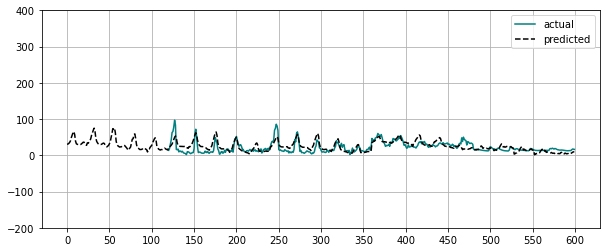

In [219]:
plt.figure(figsize=(10,4))
plt.plot(preds.index,preds.pm25,label='actual',color='teal',linestyle='-')
plt.plot(preds.index,preds.predicted_pm25,label='predicted',color='k',linestyle='--')
plt.legend()
plt.grid()
plt.yticks(np.arange(-200,450,100))
plt.xticks(np.arange(0,601,50))
plt.show()

In [220]:
eval_date_mean = preds[['pm25','predicted_pm25']].groupby(preds.date).mean()
eval_pod_mean = preds[['pm25','predicted_pm25']].groupby(preds.part_of_day).mean()
eval_hour_mean = preds[['pm25','predicted_pm25']].groupby(preds.hour).mean()


PM2.5 RMSE : 4.497657259560815
                    pm25  predicted_pm25
part_of_day                             
Afternoon      19.266250       20.759000
Early-Morning  26.726833       34.539867
Evening        15.845833       19.963467
Mid-Night      19.272125       21.638000
Morning        31.619000       37.480160
Night          17.722100       18.815840


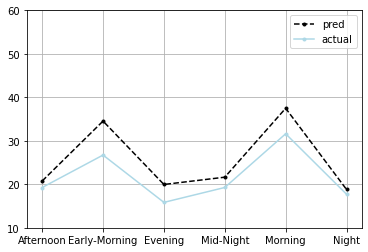

In [221]:
plt.plot(eval_pod_mean.index , eval_pod_mean.predicted_pm25,label='pred',color='k',linestyle='--',marker='.')
plt.plot(eval_pod_mean.index , eval_pod_mean.pm25,label='actual',color='lightblue',linestyle='-',marker='.')
plt.legend()
plt.yticks(np.arange(10,70,10))
plt.grid()
try:
    print('\nPM2.5 RMSE :', np.sqrt(mean_squared_error(eval_pod_mean.pm25,eval_pod_mean.predicted_pm25)))
except:    
    print('\nRMSE cannot be calculated as Null values are present. ')
print(eval_pod_mean)
plt.show()


# plt.plot(eval_hour_mean.index,eval_hour_mean.pm25,marker='.')
# plt.plot(eval_hour_mean.index,eval_hour_mean.predicted_pm25,marker='.')
# print(eval_hour_mean)
# plt.xticks(rotation=90)
# plt.show()


PM2.5 RMSE : 4.622332316320409
          pm25  predicted_pm25
hour                          
00:00  18.6200         18.2264
01:00  18.9670         19.8808
02:00  19.5490         23.3980
03:00  19.9525         25.0468
04:00  21.6620         30.1268
05:00  26.7800         34.5324
06:00  31.7385         38.9604
07:00  39.5310         43.8352
08:00  39.5135         46.6580
09:00  32.0165         42.4448
10:00  25.2140         30.4628
11:00  21.8200         24.0000
12:00  21.7600         22.3208
13:00  19.4360         20.9656
14:00  18.3290         19.6840
15:00  17.5400         20.0656
16:00  15.6040         19.8936
17:00  15.6050         19.9012
18:00  16.3285         20.0956
19:00  17.8340         20.3928
20:00  17.9790         20.5144
21:00  17.7015         18.6672
22:00  17.6180         17.8200
23:00  17.4780         16.6848


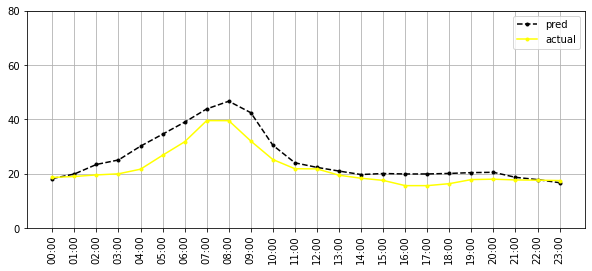

In [222]:
plt.figure(figsize=(10,4))
plt.plot(eval_hour_mean.index , eval_hour_mean.predicted_pm25,label='pred',marker='.',color='k',linestyle='--')
plt.plot(eval_hour_mean.index , eval_hour_mean.pm25,label='actual',marker='.',color='yellow',linestyle='-')
plt.legend()
plt.grid()
try:
    print('\nPM2.5 RMSE :', np.sqrt(mean_squared_error(eval_hour_mean.pm25,eval_hour_mean.predicted_pm25)))
except:    
    print('\nRMSE cannot be calculated as Null values are present. ')
print(eval_hour_mean)
plt.yticks(np.arange(0,100,20))
plt.xticks(rotation=90)
plt.show()

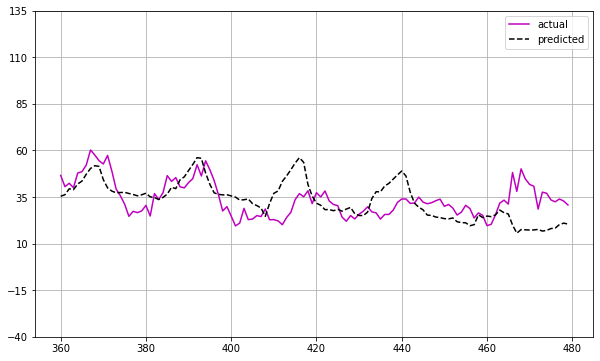


PM2.5 RMSE : 4.6618872448111945
                    pm25  predicted_pm25
part_of_day                             
Afternoon      37.201500       29.644000
Early-Morning  32.500667       40.934667
Evening        28.634667       27.952667
Mid-Night      32.454500       32.919000
Morning        42.035200       42.376000
Night          28.305600       27.142000


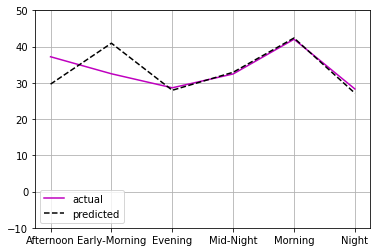


PM2.5 RMSE : 5.741211965546415
         pm25  predicted_pm25
hour                         
00:00  34.194          28.270
01:00  32.124          31.744
02:00  32.316          35.988
03:00  31.184          35.674
04:00  30.750          39.068
05:00  31.718          40.504
06:00  35.034          43.232
07:00  40.500          46.172
08:00  42.790          47.912
09:00  40.212          46.602
10:00  45.038          38.294
11:00  41.636          32.900
12:00  43.042          30.840
13:00  37.530          29.964
14:00  34.916          28.876
15:00  33.318          28.896
16:00  28.384          28.404
17:00  29.734          28.068
18:00  27.786          27.386
19:00  28.578          27.922
20:00  27.982          28.502
21:00  26.100          26.898
22:00  29.478          26.492
23:00  29.390          25.896


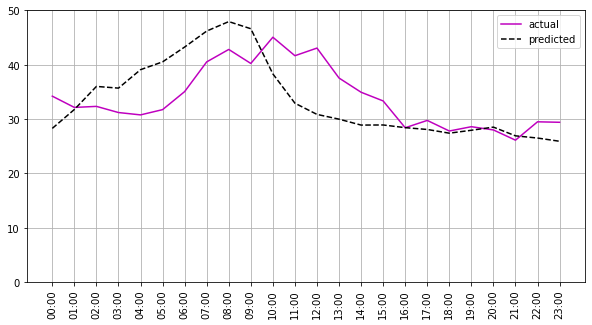

In [223]:

### Alandur

eval_pod_mean = alan[['pm25','predicted_pm25']].groupby(alan.part_of_day).mean()
eval_hour_mean = alan[['pm25','predicted_pm25']].groupby(alan.hour).mean()
plt.figure(figsize=(10,6))
plt.plot(alan.index,alan.pm25,label='actual',color='m',linestyle='-')
plt.plot(alan.index,alan.predicted_pm25,label='predicted',color='k',linestyle='--')
plt.grid()
plt.legend()
plt.yticks(np.arange(-40,150,25))
plt.show()


plt.plot(eval_pod_mean.index,eval_pod_mean.pm25,label='actual',color='m',linestyle='-')
plt.plot(eval_pod_mean.index,eval_pod_mean.predicted_pm25,label='predicted',color='k',linestyle='--')
plt.legend()
plt.grid()
try:
    print('\nPM2.5 RMSE :', np.sqrt(mean_squared_error(eval_pod_mean.pm25,eval_pod_mean.predicted_pm25)))
except:    
    print('\nRMSE cannot be calculated as Null values are present. ')
plt.yticks(np.arange(-10,60,10))
print(eval_pod_mean)
plt.show()

plt.figure(figsize=(10,5))
plt.plot(eval_hour_mean.index,eval_hour_mean.pm25,label='actual',color='m',linestyle='-')
plt.plot(eval_hour_mean.index,eval_hour_mean.predicted_pm25,label='predicted',color='k',linestyle='--')
plt.legend()
plt.xticks(rotation=90)
plt.yticks(np.arange(0,60,10))
try:
    print('\nPM2.5 RMSE :', np.sqrt(mean_squared_error(eval_hour_mean.pm25,eval_hour_mean.predicted_pm25)))
except:    
    print('\nRMSE cannot be calculated as Null values are present. ')
plt.grid()
print(eval_hour_mean)
plt.show()


# alan_date_mean = alan[['pm25','predicted_pm25']].groupby(alan.date).mean()
# plt.plot(alan_date_mean.index,alan_date_mean.pm25,label='actual')
# plt.plot(alan_date_mean.index,alan_date_mean.predicted_pm25,label='predicted')
# plt.legend()
# plt.show()
# print(alan_date_mean)


# alan_pod_mean = alan[['pm25','predicted_pm25']].groupby(alan.part_of_day).mean()
# plt.plot(alan_pod_mean.index,alan_pod_mean.pm25,label='actual')
# plt.plot(alan_pod_mean.index,alan_pod_mean.predicted_pm25,label='predicted')
# plt.legend()
# plt.show()
# print(alan_pod_mean)




# alan_hour_mean = alan[['pm25','predicted_pm25']].groupby(alan.hour).mean()
# print(alan_hour_mean)
# plt.plot()

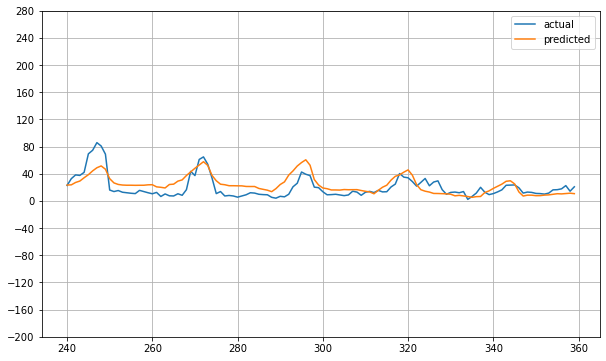


PM2.5 RMSE : 4.114071758903509
                    pm25  predicted_pm25
part_of_day                             
Afternoon      14.437500       16.868000
Early-Morning  31.016667       36.540667
Evening        10.900000       16.107333
Mid-Night      14.737500       20.241000
Morning        35.800000       37.207200
Night          12.190000       14.587200


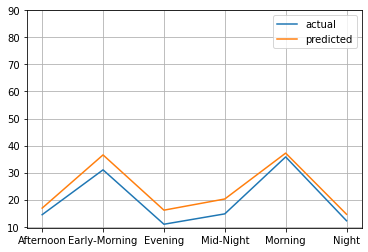


PM2.5 RMSE : 4.6912053532825295
        pm25  predicted_pm25
hour                        
00:00  11.85          15.556
01:00  15.90          17.666
02:00  16.30          22.552
03:00  14.90          25.190
04:00  19.90          31.678
05:00  34.30          36.626
06:00  38.85          41.318
07:00  49.45          45.834
08:00  48.40          48.982
09:00  42.40          42.850
10:00  22.20          27.742
11:00  16.55          20.628
12:00  17.70          18.102
13:00  12.75          17.302
14:00  13.60          16.036
15:00  13.70          16.032
16:00  10.30          16.046
17:00  10.35          16.218
18:00  12.05          16.058
19:00  13.55          15.880
20:00  12.95          16.010
21:00  13.35          14.476
22:00   9.00          13.782
23:00  12.10          12.788


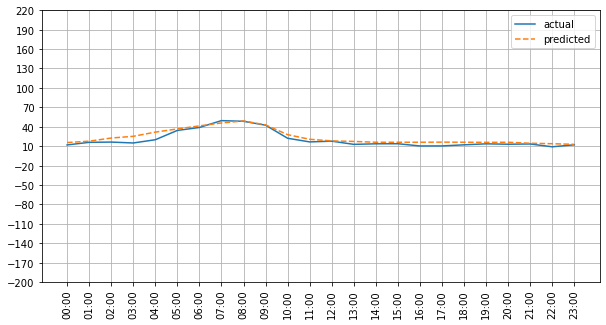

In [224]:



# ### Perungudi

eval_pod_mean = per[['pm25','predicted_pm25']].groupby(per.part_of_day).mean()
eval_hour_mean = per[['pm25','predicted_pm25']].groupby(per.hour).mean()

plt.figure(figsize=(10,6))
plt.plot(per.index,per.pm25,label='actual')
plt.plot(per.index,per.predicted_pm25,label='predicted')
plt.legend()
plt.grid()
plt.yticks(np.arange(-200,300,40))
plt.show()


plt.plot(eval_pod_mean.index,eval_pod_mean.pm25,label='actual')
plt.plot(eval_pod_mean.index,eval_pod_mean.predicted_pm25,label='predicted')
plt.legend()
plt.grid()
plt.yticks(np.arange(10,100,10))
try:
    print('\nPM2.5 RMSE :', np.sqrt(mean_squared_error(eval_pod_mean.pm25,eval_pod_mean.predicted_pm25)))
except:    
    print('\nRMSE cannot be calculated as Null values are present. ')
print(eval_pod_mean)
plt.show()

plt.figure(figsize=(10,5))
plt.plot(eval_hour_mean.index,eval_hour_mean.pm25,label='actual',linestyle='-')
plt.plot(eval_hour_mean.index,eval_hour_mean.predicted_pm25,label='predicted',linestyle='--')
plt.legend()
plt.xticks(rotation=90)
try:
    print('\nPM2.5 RMSE :', np.sqrt(mean_squared_error(eval_hour_mean.pm25,eval_hour_mean.predicted_pm25)))
except:    
    print('\nRMSE cannot be calculated as Null values are present. ')
plt.grid()
plt.yticks(np.arange(-200,230,30))
print(eval_hour_mean)
plt.show()


# per_pod_mean = per[['pm25','predicted_pm25']].groupby(per.part_of_day).mean()
# plt.plot(per_pod_mean.index,per_pod_mean.pm25,label='actual')
# plt.plot(per_pod_mean.index,per_pod_mean.predicted_pm25,label='predicted')
# plt.legend()
# plt.show()
# print(per_pod_mean)


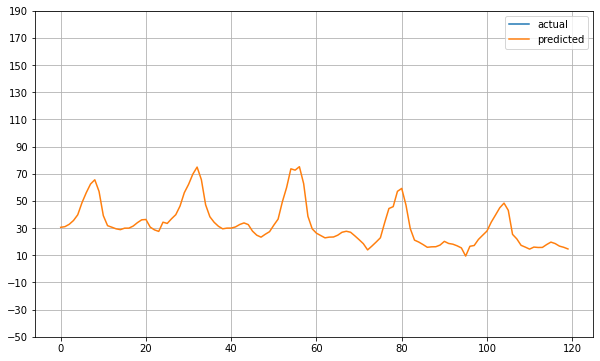

               pm25  predicted_pm25
part_of_day                        
Afternoon       NaN       23.713500
Early-Morning   NaN       47.844667
Evening         NaN       24.492000
Mid-Night       NaN       27.474500
Morning         NaN       49.112800
Night           NaN       23.380400

RMSE cannot be calculated as Null values are present. 


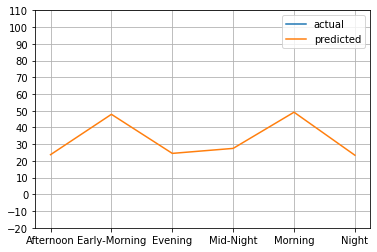

       pm25  predicted_pm25
hour                       
00:00   NaN          24.182
01:00   NaN          25.152
02:00   NaN          28.634
03:00   NaN          31.930
04:00   NaN          39.428
05:00   NaN          48.674
06:00   NaN          55.432
07:00   NaN          61.342
08:00   NaN          64.632
09:00   NaN          55.046
10:00   NaN          36.000
11:00   NaN          28.544
12:00   NaN          25.628
13:00   NaN          23.832
14:00   NaN          22.302
15:00   NaN          23.092
16:00   NaN          23.076
17:00   NaN          24.072
18:00   NaN          26.328
19:00   NaN          27.180
20:00   NaN          26.516
21:00   NaN          23.284
22:00   NaN          21.236
23:00   NaN          18.686

RMSE cannot be calculated as Null values are present. 


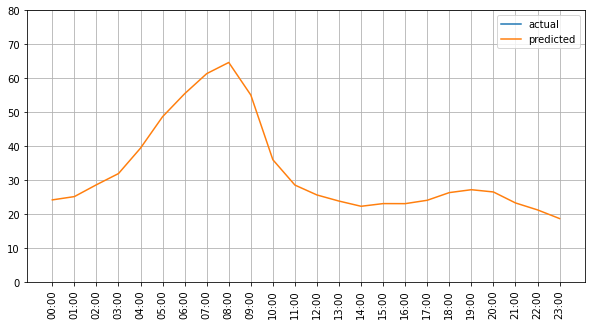

In [225]:
### Kodungaiyur


eval_pod_mean = kod[['pm25','predicted_pm25']].groupby(kod.part_of_day).mean()
eval_hour_mean = kod[['pm25','predicted_pm25']].groupby(kod.hour).mean()

plt.figure(figsize=(10,6))
plt.plot(kod.index,kod.pm25,label='actual')
plt.plot(kod.index,kod.predicted_pm25,label='predicted')
plt.legend()
plt.yticks(np.arange(-50,200,20))
plt.grid()
plt.show()



plt.plot(eval_pod_mean.index,eval_pod_mean.pm25,label='actual')
plt.plot(eval_pod_mean.index,eval_pod_mean.predicted_pm25,label='predicted')
plt.legend()
plt.grid()
plt.yticks(np.arange(-20,120,10))
print(eval_pod_mean)
try:
    print('\nPM2.5 RMSE :', np.sqrt(mean_squared_error(eval_pod_mean.pm25,eval_pod_mean.predicted_pm25)))
except:    
    print('\nRMSE cannot be calculated as Null values are present. ')
plt.show()

plt.figure(figsize=(10,5))
plt.plot(eval_hour_mean.index,eval_hour_mean.pm25,label='actual')
plt.plot(eval_hour_mean.index,eval_hour_mean.predicted_pm25,label='predicted')
plt.legend()
plt.grid()
plt.xticks(rotation=90)
print(eval_hour_mean)
try:
    print('\nPM2.5 RMSE :', np.sqrt(mean_squared_error(eval_hour_mean.pm25,eval_hour_mean.predicted_pm25)))
except:    
    print('\nRMSE cannot be calculated as Null values are present. ')
plt.yticks(np.arange(0,90,10))
plt.show()

# alan_pod_mean = kod[['pm25','predicted_pm25']].groupby(kod.part_of_day).mean()
# plt.plot(alan_pod_mean.index,alan_pod_mean.pm25,label='actual')
# plt.plot(alan_pod_mean.index,alan_pod_mean.predicted_pm25,label='predicted')
# plt.legend()
# plt.show()
# print(alan_pod_mean)



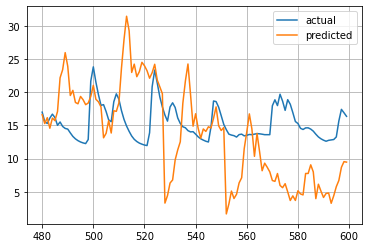

                    pm25  predicted_pm25
part_of_day                             
Afternoon      13.038500         14.5965
Early-Morning  15.940000         11.1900
Evening        13.265333         13.6120
Mid-Night      16.184000          8.5425
Morning        14.400800         18.1088
Night          18.642800         14.2164

PM2.5 RMSE : 4.412951487530347


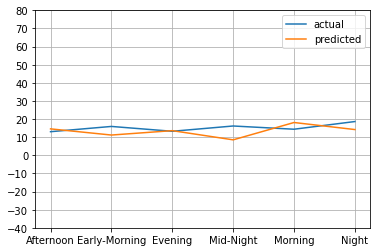

         pm25  predicted_pm25
hour                         
00:00  16.986           7.950
01:00  16.044           8.084
02:00  15.880           9.548
03:00  15.826           8.588
04:00  16.298          10.586
05:00  16.052          11.040
06:00  15.470          11.944
07:00  15.124          16.682
08:00  14.714          18.960
09:00  14.354          21.492
10:00  14.068          19.068
11:00  13.744          14.342
12:00  13.398          16.244
13:00  13.114          14.302
14:00  12.900          13.356
15:00  12.742          14.484
16:00  12.682          14.098
17:00  12.636          13.492
18:00  14.478          13.246
19:00  18.658          14.150
20:00  19.884          15.502
21:00  19.556          14.078
22:00  18.194          13.758
23:00  16.922          13.594

PM2.5 RMSE : 4.662498364610973


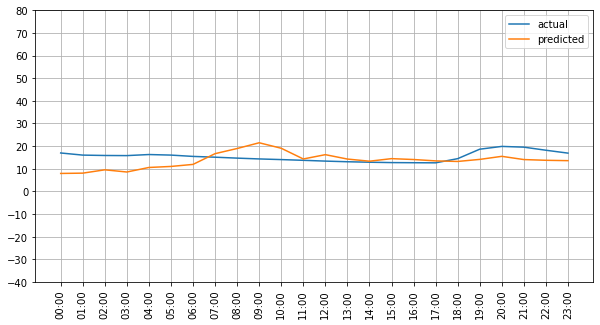

In [226]:
# ### Velacheri


eval_pod_mean = vel[['pm25','predicted_pm25']].groupby(vel.part_of_day).mean()
eval_hour_mean = vel[['pm25','predicted_pm25']].groupby(vel.hour).mean()

plt.plot(vel.index,vel.pm25,label='actual')
plt.plot(vel.index,vel.predicted_pm25,label='predicted')
plt.legend()
plt.grid()
# plt.yticks(np.arange(-40,90,10))
plt.show()

plt.plot(eval_pod_mean.index,eval_pod_mean.pm25,label='actual')
plt.plot(eval_pod_mean.index,eval_pod_mean.predicted_pm25,label='predicted')
plt.legend()
plt.yticks(np.arange(-40,90,10))
plt.grid()
print(eval_pod_mean)
try:
    print('\nPM2.5 RMSE :', np.sqrt(mean_squared_error(eval_pod_mean.pm25,eval_pod_mean.predicted_pm25)))
except:    
    print('\nRMSE cannot be calculated as Null values are present. ')
plt.show()

plt.figure(figsize=(10,5))
plt.plot(eval_hour_mean.index,eval_hour_mean.pm25,label='actual')
plt.plot(eval_hour_mean.index,eval_hour_mean.predicted_pm25,label='predicted')
plt.legend()
plt.grid()
plt.xticks(rotation=90)
print(eval_hour_mean)
try:
    print('\nPM2.5 RMSE :', np.sqrt(mean_squared_error(eval_hour_mean.pm25,eval_hour_mean.predicted_pm25)))
except:    
    print('\nRMSE cannot be calculated as Null values are present. ')
plt.yticks(np.arange(-40,90,10))
plt.show()

# alan_pod_mean = vel[['pm25','predicted_pm25']].groupby(vel.part_of_day).mean()
# plt.plot(alan_pod_mean.index,alan_pod_mean.pm25,label='actual')
# plt.plot(alan_pod_mean.index,alan_pod_mean.predicted_pm25,label='predicted')
# plt.legend()
# plt.show()
# print(alan_pod_mean)

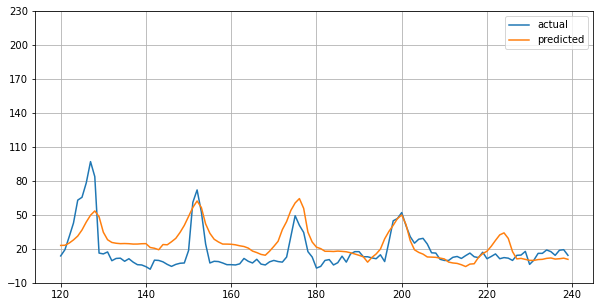

                    pm25  predicted_pm25
part_of_day                             
Afternoon      12.387500       18.973000
Early-Morning  27.450000       36.189333
Evening        10.583333       17.653333
Mid-Night      13.712500       19.013000
Morning        34.240000       40.596000
Night          11.750000       14.753200

PM2.5 RMSE : 6.4192796045858485


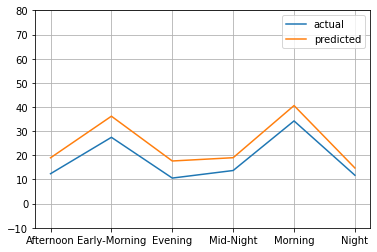

        pm25  predicted_pm25
hour                        
00:00  11.45          15.174
01:00  11.80          16.758
02:00  13.70          20.268
03:00  17.90          23.852
04:00  19.70          29.874
05:00  25.05          35.818
06:00  37.60          42.876
07:00  53.05          49.146
08:00  52.15          52.804
09:00  31.10          46.234
10:00  19.55          31.210
11:00  15.35          23.586
12:00  12.90          20.790
13:00  14.35          19.428
14:00  11.90          17.850
15:00  10.40          17.824
16:00  11.05          17.844
17:00   9.70          17.656
18:00  11.00          17.460
19:00  10.55          16.832
20:00  11.10          16.042
21:00  11.80          14.600
22:00  13.80          13.832
23:00  11.50          12.460

PM2.5 RMSE : 7.115708186821604


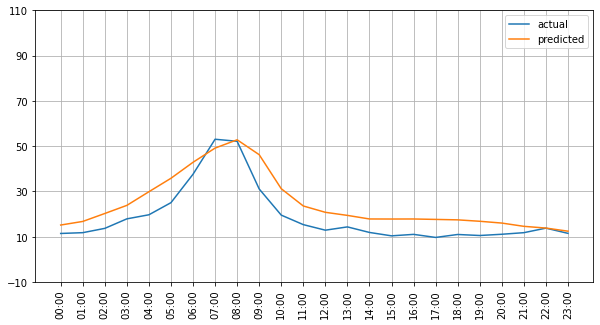

In [227]:
# ### Royapuram


eval_pod_mean = roy[['pm25','predicted_pm25']].groupby(roy.part_of_day).mean()
eval_hour_mean = roy[['pm25','predicted_pm25']].groupby(roy.hour).mean()

plt.figure(figsize=(10,5))
plt.plot(roy.index,roy.pm25,label='actual')
plt.plot(roy.index,roy.predicted_pm25,label='predicted')
plt.legend()
plt.grid()
plt.yticks(np.arange(-10,250,30))
plt.show()

plt.plot(eval_pod_mean.index,eval_pod_mean.pm25,label='actual')
plt.plot(eval_pod_mean.index,eval_pod_mean.predicted_pm25,label='predicted')
plt.legend()
plt.yticks(np.arange(-10,90,10))
plt.grid()
print(eval_pod_mean)
try:
    print('\nPM2.5 RMSE :', np.sqrt(mean_squared_error(eval_pod_mean.pm25,eval_pod_mean.predicted_pm25)))
except:    
    print('\nRMSE cannot be calculated as Null values are present. ')
plt.show()

plt.figure(figsize=(10,5))
plt.plot(eval_hour_mean.index,eval_hour_mean.pm25,label='actual')
plt.plot(eval_hour_mean.index,eval_hour_mean.predicted_pm25,label='predicted')
plt.legend()
plt.grid()
plt.yticks(np.arange(-10,120,20))
plt.xticks(rotation=90)
print(eval_hour_mean)
try:
    print('\nPM2.5 RMSE :', np.sqrt(mean_squared_error(eval_hour_mean.pm25,eval_hour_mean.predicted_pm25)))
except:    
    print('\nRMSE cannot be calculated as Null values are present. ')
plt.show()



# NOx evaluations

In [228]:
print('The range of NOX lies between :',preds.nox.min(),' to ',preds.nox.max())
print('Average NOX :',round(preds.nox.mean(),2))

The range of NOX lies between : 1.3  to  122.1
Average NOX : 12.73


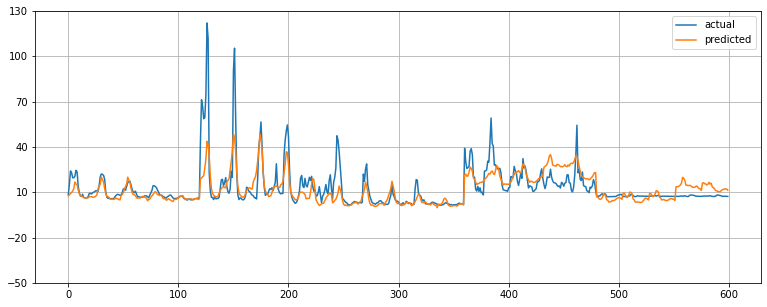

In [229]:
plt.figure(figsize=(13,5))
plt.plot(preds.index,preds.nox,label='actual')
plt.plot(preds.index,preds.predicted_nox,label='predicted')
plt.legend()
plt.yticks(np.arange(-50,150,30))
plt.grid()
plt.show()

In [230]:
eval_date_mean = preds[['nox','predicted_nox']].groupby(preds.date).mean()
eval_pod_mean = preds[['nox','predicted_nox']].groupby(preds.part_of_day).mean()
eval_hour_mean = preds[['nox','predicted_nox']].groupby(preds.hour).mean()

           nox  predicted_nox
hour                         
00:00  13.0172        11.7144
01:00  13.2252        12.3436
02:00  13.7560        12.4304
03:00  14.3392        13.5468
04:00  18.6528        15.6000
05:00  22.1672        18.4704
06:00  28.0860        21.8936
07:00  26.7724        20.5188
08:00  18.6244        17.3644
09:00  12.5968        12.6252
10:00   9.0180        10.0760
11:00   8.2308         8.7012
12:00   7.7324         8.5708
13:00   7.3756         8.2944
14:00   6.8448         7.8296
15:00   6.6396         7.7292
16:00   7.0952         7.8608
17:00   7.3196         8.2200
18:00   9.4156         9.1240
19:00  10.2068         9.8624
20:00  10.4504        10.0556
21:00  11.8384        10.2352
22:00  11.2800        10.2212
23:00  10.7556         9.7120

NOX RMSE : 2.221756656342003


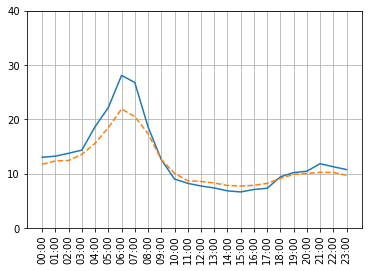

In [231]:
plt.plot(eval_hour_mean.index,eval_hour_mean.nox)
plt.plot(eval_hour_mean.index,eval_hour_mean.predicted_nox,linestyle='--')
plt.xticks(rotation=90)
print(eval_hour_mean)
try:
    print('\nNOX RMSE :', np.sqrt(mean_squared_error(eval_hour_mean.nox,eval_hour_mean.predicted_nox)))
except:    
    print('\nRMSE cannot be calculated as Null values are present. ')
plt.grid()
plt.yticks(np.arange(0,50,10))
plt.show()


                     nox  predicted_nox
part_of_day                            
Afternoon       7.148100       8.106000
Early-Morning  22.968667      18.654667
Evening         7.943467       8.401600
Mid-Night      13.584400      12.508800
Morning        15.048480      13.857120
Night          10.906240      10.017280

NOX RMSE : 1.9623352776862208


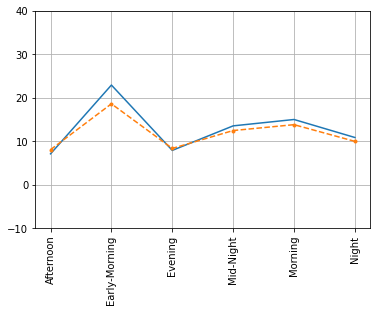

In [232]:
plt.plot(eval_pod_mean.index,eval_pod_mean.nox)
plt.plot(eval_pod_mean.index,eval_pod_mean.predicted_nox,marker='.',linestyle='--')
plt.xticks(rotation=90)
plt.grid()
print(eval_pod_mean)
try:
    print('\nNOX RMSE :', np.sqrt(mean_squared_error(eval_pod_mean.nox,eval_pod_mean.predicted_nox)))
except:    
    print('\nRMSE cannot be calculated as Null values are present. ')
plt.yticks(np.arange(-10,50,10))
plt.show()

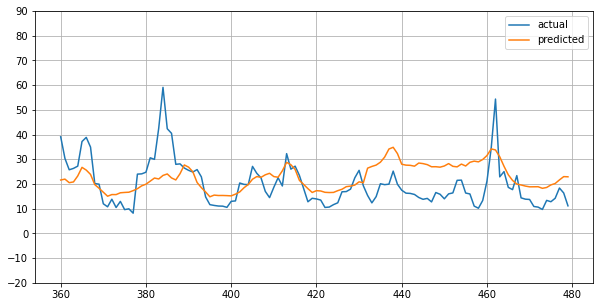

                     nox  predicted_nox
part_of_day                            
Afternoon      12.372000      19.069000
Early-Morning  29.050667      29.026000
Evening        13.964667      19.224667
Mid-Night      23.857000      24.850000
Morning        19.464800      22.273600
Night          21.286000      22.178000

NOX RMSE : 3.70110541785479


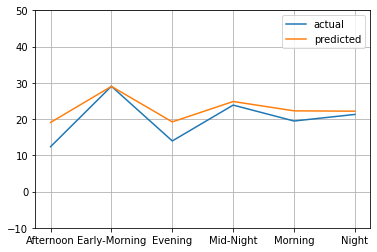

          nox  predicted_nox
hour                        
00:00  29.296         24.784
01:00  22.106         25.332
02:00  21.988         24.508
03:00  22.038         24.776
04:00  23.082         27.022
05:00  30.086         30.296
06:00  33.984         29.760
07:00  25.946         27.592
08:00  22.386         23.380
09:00  19.164         21.582
10:00  14.682         20.100
11:00  15.146         18.714
12:00  13.598         19.310
13:00  12.532         19.116
14:00  12.470         19.010
15:00  10.888         18.840
16:00  12.340         18.856
17:00  11.844         19.102
18:00  17.710         19.716
19:00  17.928         20.894
20:00  18.598         21.236
21:00  24.006         22.234
22:00  23.536         23.454
23:00  22.362         23.072

NOX RMSE : 4.233799180405231


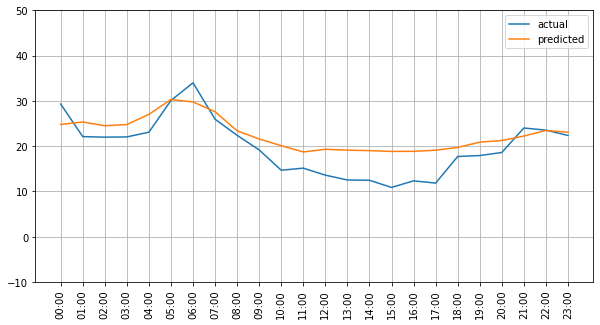

In [233]:

# ### Alandur
eval_pod_mean = alan[['nox','predicted_nox']].groupby(alan.part_of_day).mean()
eval_hour_mean = alan[['nox','predicted_nox']].groupby(alan.hour).mean()

plt.figure(figsize=(10,5))
plt.plot(alan.index,alan.nox,label='actual')
plt.plot(alan.index,alan.predicted_nox,label='predicted')
plt.legend()
plt.yticks(np.arange(-20,100,10))
plt.grid()
plt.show()


plt.plot(eval_pod_mean.index,eval_pod_mean.nox,label='actual')
plt.plot(eval_pod_mean.index,eval_pod_mean.predicted_nox,label='predicted')
plt.legend()
plt.yticks(np.arange(-10,60,10))
plt.grid()
print(eval_pod_mean)
try:
    print('\nNOX RMSE :', np.sqrt(mean_squared_error(eval_pod_mean.nox,eval_pod_mean.predicted_nox)))
except:    
    print('\nRMSE cannot be calculated as Null values are present. ')
plt.show()

plt.figure(figsize=(10,5))
plt.plot(eval_hour_mean.index,eval_hour_mean.nox,label='actual')
plt.plot(eval_hour_mean.index,eval_hour_mean.predicted_nox,label='predicted')
plt.legend()
plt.yticks(np.arange(-10,60,10))
plt.grid()
plt.xticks(rotation=90)
print(eval_hour_mean)
try:
    print('\nNOX RMSE :', np.sqrt(mean_squared_error(eval_hour_mean.nox,eval_hour_mean.predicted_nox)))
except:    
    print('\nRMSE cannot be calculated as Null values are present. ')
plt.show()


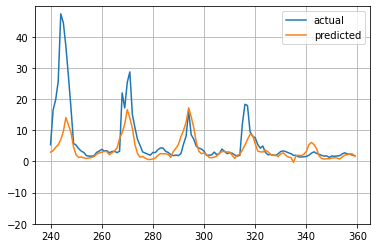

                     nox  predicted_nox
part_of_day                            
Afternoon       2.255000          1.550
Early-Morning  18.354667          9.596
Evening         2.484000          1.612
Mid-Night       5.621000          3.597
Morning         7.886000          5.462
Night           2.968000          2.296

NOX RMSE : 3.8383066313540266


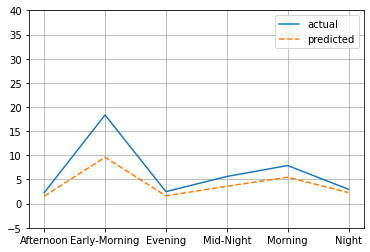

          nox  predicted_nox
hour                        
00:00   2.894          2.364
01:00   4.996          3.008
02:00   5.580          3.688
03:00   9.014          5.328
04:00  18.986          6.928
05:00  17.948          9.310
06:00  18.130         12.550
07:00  15.150         10.762
08:00   9.868          8.116
09:00   5.862          4.248
10:00   4.560          2.398
11:00   3.990          1.786
12:00   2.876          2.048
13:00   2.190          1.696
14:00   2.052          1.258
15:00   1.902          1.198
16:00   2.258          1.342
17:00   2.230          1.334
18:00   2.964          2.160
19:00   3.560          2.630
20:00   3.408          2.546
21:00   2.852          2.506
22:00   2.736          2.436
23:00   2.284          1.362

NOX RMSE : 3.617196888936699


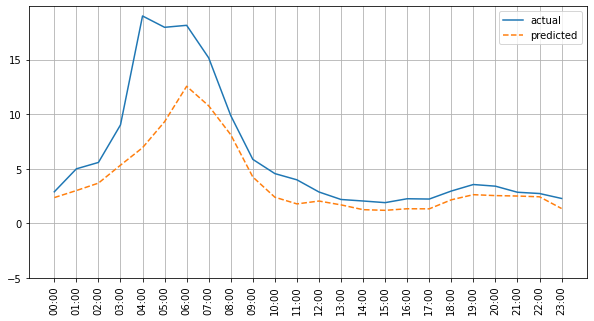

In [234]:
# ### Perungudi

eval_pod_mean = per[['nox','predicted_nox']].groupby(per.part_of_day).mean()
eval_hour_mean = per[['nox','predicted_nox']].groupby(per.hour).mean()


plt.plot(per.index,per.nox,label='actual')
plt.plot(per.index,per.predicted_nox,label='predicted')
plt.legend()
plt.yticks(np.arange(-20,50,10))
plt.grid()
plt.show()


plt.plot(eval_pod_mean.index,eval_pod_mean.nox,label='actual')
plt.plot(eval_pod_mean.index,eval_pod_mean.predicted_nox,label='predicted',linestyle='--')
plt.legend()
plt.yticks(np.arange(-5,45,5))
plt.grid()
print(eval_pod_mean)
try:
    print('\nNOX RMSE :', np.sqrt(mean_squared_error(eval_pod_mean.nox,eval_pod_mean.predicted_nox)))
except:    
    print('\nRMSE cannot be calculated as Null values are present. ')
plt.show()

plt.figure(figsize=(10,5))
plt.plot(eval_hour_mean.index,eval_hour_mean.nox,label='actual')
plt.plot(eval_hour_mean.index,eval_hour_mean.predicted_nox,label='predicted',linestyle='--')
plt.legend()
plt.yticks(np.arange(-5,20,5))
plt.grid()
plt.xticks(rotation=90)
print(eval_hour_mean)
try:
    print('\nNOX RMSE :', np.sqrt(mean_squared_error(eval_hour_mean.nox,eval_hour_mean.predicted_nox)))
except:    
    print('\nRMSE cannot be calculated as Null values are present. ')
plt.show()


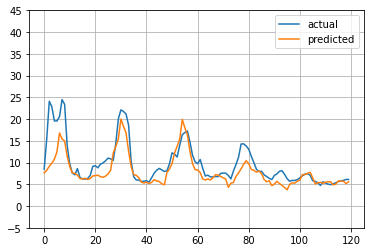

                     nox  predicted_nox
part_of_day                            
Afternoon       6.924000         6.4380
Early-Morning  14.568667        12.3040
Evening         6.184667         5.6480
Mid-Night      10.503000         7.5485
Morning        12.661200        10.5832
Night           7.610000         5.8916

NOX RMSE : 1.8996918623916452


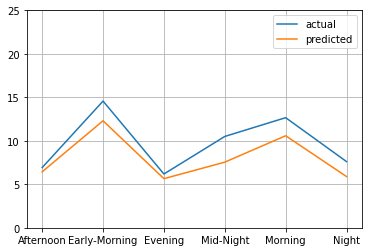

          nox  predicted_nox
hour                        
00:00   7.950          6.312
01:00   9.662          6.944
02:00  12.226          7.578
03:00  12.174          9.360
04:00  12.592         10.360
05:00  14.962         11.826
06:00  16.152         14.726
07:00  16.876         13.938
08:00  16.390         13.136
09:00  12.900         10.308
10:00   9.464          8.254
11:00   7.676          7.280
12:00   7.116          7.280
13:00   7.774          6.806
14:00   6.666          5.932
15:00   6.140          5.734
16:00   6.086          5.904
17:00   5.942          5.368
18:00   6.526          5.672
19:00   7.294          6.330
20:00   7.612          6.162
21:00   7.794          5.998
22:00   7.784          5.564
23:00   7.566          5.404

NOX RMSE : 2.0678298608283354


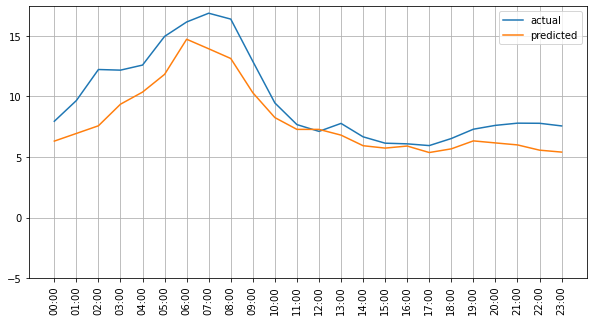

In [235]:
# ### Kodungaiyur

eval_pod_mean = kod[['nox','predicted_nox']].groupby(kod.part_of_day).mean()
eval_hour_mean = kod[['nox','predicted_nox']].groupby(kod.hour).mean()

plt.plot(kod.index,kod.nox,label='actual')
plt.plot(kod.index,kod.predicted_nox,label='predicted')
plt.legend()
plt.yticks(np.arange(-5,50,5))
plt.grid()
plt.show()

plt.plot(eval_pod_mean.index,eval_pod_mean.nox,label='actual')
plt.plot(eval_pod_mean.index,eval_pod_mean.predicted_nox,label='predicted')
plt.legend()
print(eval_pod_mean)
try:
    print('\nNOX RMSE :', np.sqrt(mean_squared_error(eval_pod_mean.nox,eval_pod_mean.predicted_nox)))
except:    
    print('\nRMSE cannot be calculated as Null values are present. ')
plt.yticks(np.arange(0,30,5))
plt.grid()
plt.show()

plt.figure(figsize=(10,5))
plt.plot(eval_hour_mean.index,eval_hour_mean.nox,label='actual')
plt.plot(eval_hour_mean.index,eval_hour_mean.predicted_nox,label='predicted')
plt.legend()
plt.xticks(rotation=90)
plt.yticks(np.arange(-5,20,5))
plt.grid()
print(eval_hour_mean)
try:
    print('\nNOX RMSE :', np.sqrt(mean_squared_error(eval_hour_mean.nox,eval_hour_mean.predicted_nox)))
except:    
    print('\nRMSE cannot be calculated as Null values are present. ')
plt.show()



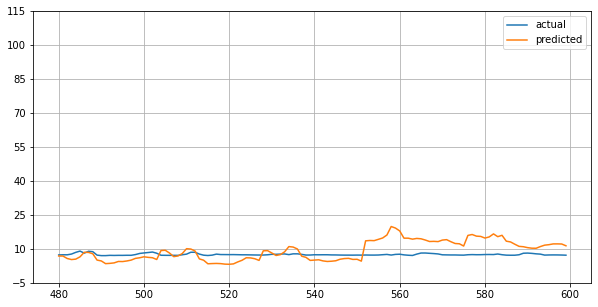

                    nox  predicted_nox
part_of_day                           
Afternoon      7.562500       7.407500
Early-Morning  7.678000      11.313333
Evening        7.439333       7.604000
Mid-Night      7.334500      10.491000
Morning        7.552400      10.054400
Night          7.461200       8.281600

NOX RMSE : 2.2421470723971826


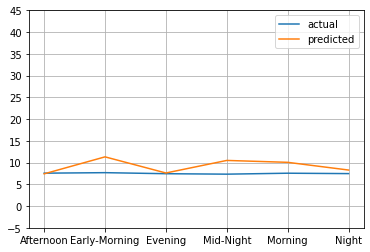

         nox  predicted_nox
hour                       
00:00  7.276         10.932
01:00  7.312         11.076
02:00  7.338         10.246
03:00  7.412          9.710
04:00  7.620          9.858
05:00  7.830         10.888
06:00  7.584         13.194
07:00  8.090         12.728
08:00  8.006         12.130
09:00  7.398          9.086
10:00  7.156          8.718
11:00  7.112          7.610
12:00  7.352          7.556
13:00  7.658          7.572
14:00  7.648          7.392
15:00  7.592          7.110
16:00  7.518          7.180
17:00  7.458          7.458
18:00  7.342          8.174
19:00  7.430          8.512
20:00  7.472          8.728
21:00  7.498          8.416
22:00  7.520          8.288
23:00  7.386          7.464

NOX RMSE : 2.3848414692245963


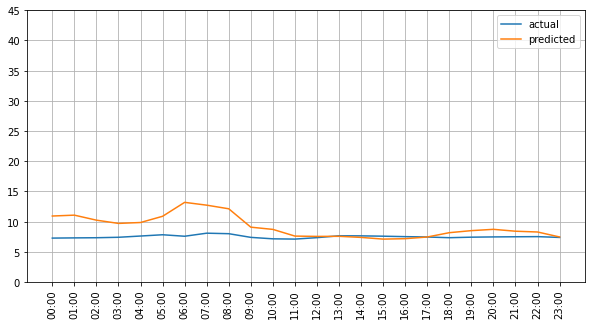

In [236]:
# ### Velacheri

eval_pod_mean = vel[['nox','predicted_nox']].groupby(vel.part_of_day).mean()
eval_hour_mean = vel[['nox','predicted_nox']].groupby(vel.hour).mean()


plt.figure(figsize=(10,5))
plt.plot(vel.index,vel.nox,label='actual')
plt.plot(vel.index,vel.predicted_nox,label='predicted')
plt.legend()
plt.yticks(np.arange(-5,120,15))
plt.grid()
plt.show()


plt.plot(eval_pod_mean.index,eval_pod_mean.nox,label='actual')
plt.plot(eval_pod_mean.index,eval_pod_mean.predicted_nox,label='predicted')
plt.yticks(np.arange(-5,50,5))
plt.grid()
plt.legend()
print(eval_pod_mean)
try:
    print('\nNOX RMSE :', np.sqrt(mean_squared_error(eval_pod_mean.nox,eval_pod_mean.predicted_nox)))
except:    
    print('\nRMSE cannot be calculated as Null values are present. ')
plt.show()

plt.figure(figsize=(10,5))
plt.plot(eval_hour_mean.index,eval_hour_mean.nox,label='actual')
plt.plot(eval_hour_mean.index,eval_hour_mean.predicted_nox,label='predicted')
plt.legend()
plt.yticks(np.arange(0,50,5))
plt.grid()
plt.xticks(rotation=90)
print(eval_hour_mean)
try:
    print('\nNOX RMSE :', np.sqrt(mean_squared_error(eval_hour_mean.nox,eval_hour_mean.predicted_nox)))
except:    
    print('\nRMSE cannot be calculated as Null values are present. ')    
plt.show()


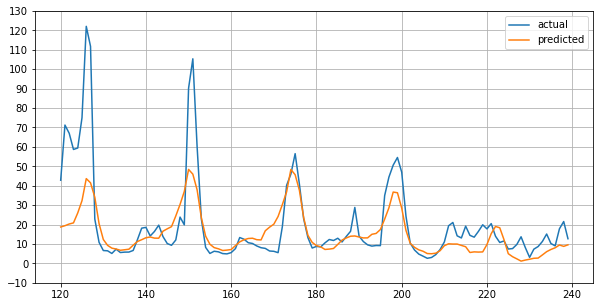

                     nox  predicted_nox
part_of_day                            
Afternoon       6.627000       6.065500
Early-Morning  45.191333      31.034000
Evening         9.644667       7.919333
Mid-Night      20.606500      16.057500
Morning        27.678000      20.912400
Night          15.206000      11.439200

NOX RMSE : 6.884495516160719


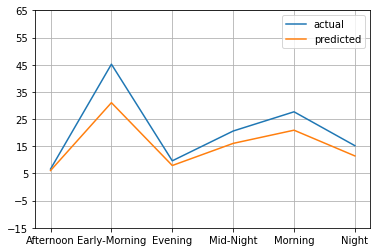

          nox  predicted_nox
hour                        
00:00  17.670         14.180
01:00  22.050         15.358
02:00  21.648         16.132
03:00  21.058         18.560
04:00  30.984         23.832
05:00  40.010         30.032
06:00  64.580         39.238
07:00  67.800         37.574
08:00  36.472         30.060
09:00  17.660         17.902
10:00   9.228         10.910
11:00   7.230          8.116
12:00   7.720          6.660
13:00   6.724          6.282
14:00   5.388          5.556
15:00   6.676          5.764
16:00   7.274          6.022
17:00   9.124          7.838
18:00  12.536          9.898
19:00  14.822         10.946
20:00  15.162         11.606
21:00  17.042         12.022
22:00  14.824         11.364
23:00  14.180         11.258

NOX RMSE : 8.969144217816993


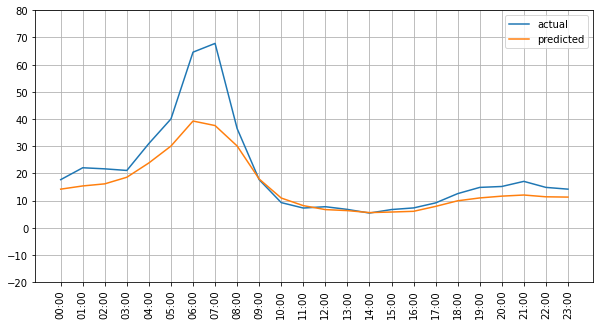

In [237]:
# ## Royapuram

eval_pod_mean = roy[['nox','predicted_nox']].groupby(roy.part_of_day).mean()
eval_hour_mean = roy[['nox','predicted_nox']].groupby(roy.hour).mean()

plt.figure(figsize=(10,5))
plt.plot(roy.index,roy.nox,label='actual')
plt.plot(roy.index,roy.predicted_nox,label='predicted')
plt.legend()
plt.yticks(np.arange(-10,140,10))
plt.grid()
plt.show()


plt.plot(eval_pod_mean.index,eval_pod_mean.nox,label='actual')
plt.plot(eval_pod_mean.index,eval_pod_mean.predicted_nox,label='predicted')
plt.legend()
plt.yticks(np.arange(-15,70,10))
print(eval_pod_mean)
try:
    print('\nNOX RMSE :', np.sqrt(mean_squared_error(eval_pod_mean.nox,eval_pod_mean.predicted_nox)))
except:    
    print('\nRMSE cannot be calculated as Null values are present. ')
plt.grid()
plt.show()

plt.figure(figsize=(10,5))
plt.plot(eval_hour_mean.index,eval_hour_mean.nox,label='actual')
plt.plot(eval_hour_mean.index,eval_hour_mean.predicted_nox,label='predicted')
plt.legend()
plt.yticks(np.arange(-20,90,10))
plt.grid()
plt.xticks(rotation=90)
print(eval_hour_mean)
try:
    print('\nNOX RMSE :', np.sqrt(mean_squared_error(eval_hour_mean.nox,eval_hour_mean.predicted_nox)))
except:    
    print('\nRMSE cannot be calculated as Null values are present. ')
plt.show()

# Temperature evaluations

In [238]:
print('The range of Temperature lies between :',preds.temperature.min(),' to ',preds.temperature.max())
print('Average Temp :',round(preds.temperature.mean(),2))

The range of Temperature lies between : 26.08  to  33.03
Average Temp : 27.75


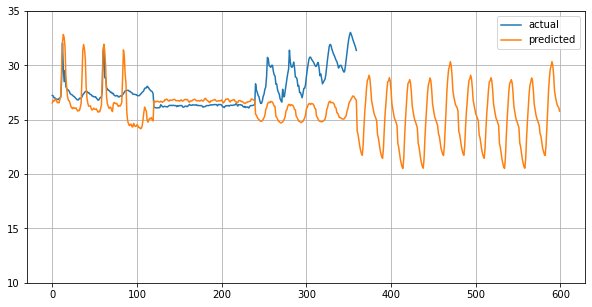

In [239]:
plt.figure(figsize=(10,5))
plt.plot(preds.index,preds.temperature,label='actual')
plt.plot(preds.index,preds.predicted_temperature,label='predicted')
plt.legend()
plt.grid()
plt.yticks(np.arange(10,40,5))
plt.show()

In [240]:
eval_date_mean = preds[['temperature','predicted_temperature']].groupby(preds.date).mean()
eval_pod_mean = preds[['temperature','predicted_temperature']].groupby(preds.part_of_day).mean()
eval_hour_mean = preds[['temperature','predicted_temperature']].groupby(preds.hour).mean()

       temperature  predicted_temperature
hour                                     
00:00    27.582000                24.9804
01:00    27.511333                24.8580
02:00    27.375333                24.5680
03:00    27.290667                24.3184
04:00    27.190667                24.1884
05:00    27.125333                24.0272
06:00    27.024667                23.9264
07:00    26.958000                24.3144
08:00    27.124667                25.0280
09:00    27.136667                25.6908
10:00    27.176000                26.2668
11:00    27.508000                27.1892
12:00    28.206000                28.0756
13:00    28.333333                28.2592
14:00    28.349333                28.3164
15:00    28.542667                28.0748
16:00    28.504667                27.2576
17:00    28.402667                26.5708
18:00    28.307333                26.3352
19:00    28.256667                26.1556
20:00    28.199333                26.0020
21:00    28.118667                

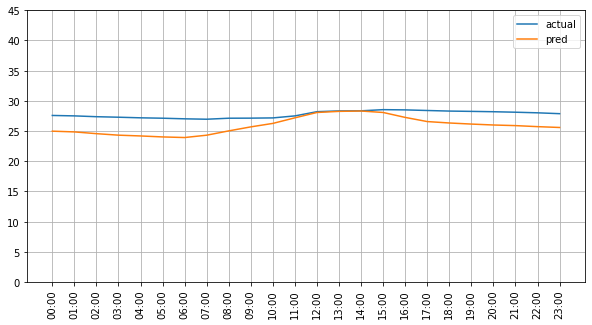

In [241]:
plt.figure(figsize=(10,5))
plt.plot(eval_hour_mean.index,eval_hour_mean.temperature,label='actual')
plt.plot(eval_hour_mean.index,eval_hour_mean.predicted_temperature,label='pred')
plt.xticks(rotation=90)
plt.yticks(np.arange(0,50,5))
print(eval_hour_mean)
try:
    print('\nTEMP RMSE :', np.sqrt(mean_squared_error(eval_hour_mean.temperature,eval_hour_mean.predicted_temperature)))
except:    
    print('\nRMSE cannot be calculated as Null values are present. ')
plt.grid()
plt.legend()
plt.show()

               temperature  predicted_temperature
part_of_day                                      
Afternoon        28.357833              28.181500
Early-Morning    27.113556              24.047333
Evening          28.404889              26.721200
Mid-Night        27.439833              24.681200
Morning          27.180667              25.697840
Night            28.093867              25.875680

TEMP RMSE : 2.121194840744051


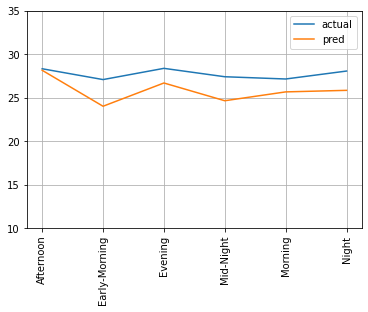

In [242]:
plt.plot(eval_pod_mean.index,eval_pod_mean.temperature,label='actual')
plt.plot(eval_pod_mean.index,eval_pod_mean.predicted_temperature,label='pred')
plt.xticks(rotation=90)
plt.yticks(np.arange(10,40,5))
plt.grid()
print(eval_pod_mean)
try:
    print('\nTEMP RMSE :', np.sqrt(mean_squared_error(eval_pod_mean.temperature,eval_pod_mean.predicted_temperature)))
except:    
    print('\nRMSE cannot be calculated as Null values are present. ')
plt.legend()
plt.show()

In [243]:
# eval_pod_mean

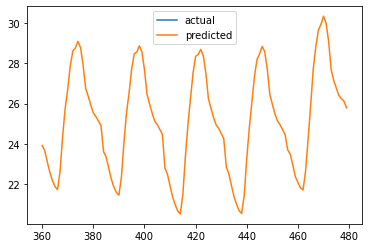

               temperature  predicted_temperature
part_of_day                                      
Afternoon              NaN              28.881500
Early-Morning          NaN              21.378667
Evening                NaN              26.984000
Mid-Night              NaN              22.752500
Morning                NaN              25.188800
Night                  NaN              25.261600

RMSE cannot be calculated as Null values are present. 


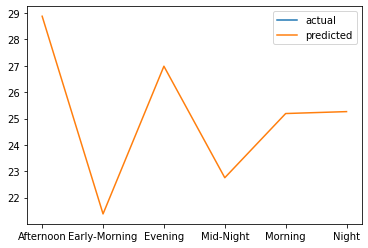

       temperature  predicted_temperature
hour                                     
00:00          NaN                 23.378
01:00          NaN                 23.096
02:00          NaN                 22.544
03:00          NaN                 21.992
04:00          NaN                 21.622
05:00          NaN                 21.324
06:00          NaN                 21.190
07:00          NaN                 22.114
08:00          NaN                 23.886
09:00          NaN                 25.410
10:00          NaN                 26.670
11:00          NaN                 27.864
12:00          NaN                 28.658
13:00          NaN                 28.836
14:00          NaN                 29.166
15:00          NaN                 28.866
16:00          NaN                 27.984
17:00          NaN                 26.722
18:00          NaN                 26.246
19:00          NaN                 25.806
20:00          NaN                 25.432
21:00          NaN                

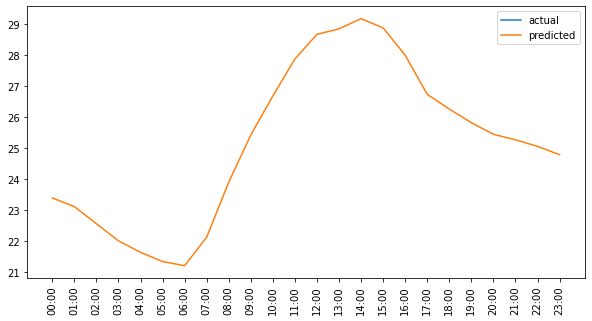

In [244]:

# ### Alandur
eval_pod_mean = alan[['temperature','predicted_temperature']].groupby(alan.part_of_day).mean()
eval_hour_mean = alan[['temperature','predicted_temperature']].groupby(alan.hour).mean()

plt.plot(alan.index,alan.temperature,label='actual')
plt.plot(alan.index,alan.predicted_temperature,label='predicted')
plt.legend()
plt.show()

plt.plot(eval_pod_mean.index,eval_pod_mean.temperature,label='actual')
plt.plot(eval_pod_mean.index,eval_pod_mean.predicted_temperature,label='predicted')
plt.legend()
print(eval_pod_mean)
try:
    print('\nTEMP RMSE :', np.sqrt(mean_squared_error(eval_pod_mean.temperature,eval_pod_mean.predicted_temperature)))
except:    
    print('\nRMSE cannot be calculated as Null values are present. ')
plt.show()

plt.figure(figsize=(10,5))
plt.plot(eval_hour_mean.index,eval_hour_mean.temperature,label='actual')
plt.plot(eval_hour_mean.index,eval_hour_mean.predicted_temperature,label='predicted')
plt.legend()
plt.xticks(rotation=90)
print(eval_hour_mean)
try:
    print('\nTEMP RMSE :', np.sqrt(mean_squared_error(eval_hour_mean.temperature,eval_hour_mean.predicted_temperature)))
except:    
    print('\nRMSE cannot be calculated as Null values are present. ')
plt.show()


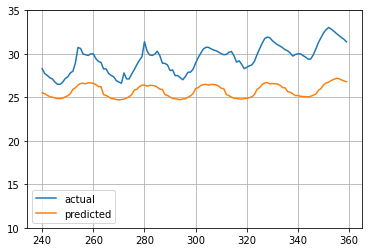

               temperature  predicted_temperature
part_of_day                                      
Afternoon        30.251000              26.219500
Early-Morning    28.032667              24.889333
Evening          31.146000              26.593333
Mid-Night        28.835500              25.219000
Morning          28.096000              25.058000
Night            30.444400              26.435600

TEMP RMSE : 3.7691578228702105


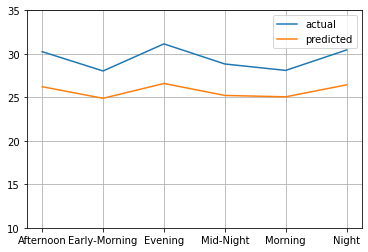

       temperature  predicted_temperature
hour                                     
00:00       29.150                 25.422
01:00       28.998                 25.328
02:00       28.670                 25.144
03:00       28.524                 24.982
04:00       28.204                 24.952
05:00       28.074                 24.880
06:00       27.820                 24.836
07:00       27.612                 24.872
08:00       27.956                 24.890
09:00       28.034                 25.012
10:00       28.196                 25.146
11:00       28.682                 25.370
12:00       29.266                 25.896
13:00       29.938                 26.048
14:00       30.730                 26.382
15:00       31.070                 26.552
16:00       31.418                 26.596
17:00       31.136                 26.544
18:00       30.884                 26.640
19:00       30.778                 26.648
20:00       30.694                 26.612
21:00       30.546                

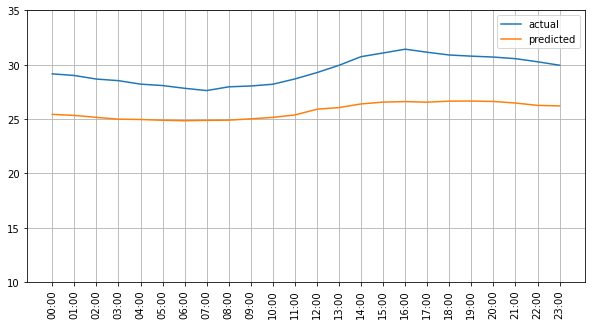

In [245]:
# ## Perungudi
eval_pod_mean = per[['temperature','predicted_temperature']].groupby(per.part_of_day).mean()
eval_hour_mean = per[['temperature','predicted_temperature']].groupby(per.hour).mean()


plt.plot(per.index,per.temperature,label='actual')
plt.plot(per.index,per.predicted_temperature,label='predicted')
plt.legend()
plt.yticks(np.arange(10,40,5))
plt.grid()
plt.show()

plt.plot(eval_pod_mean.index,eval_pod_mean.temperature,label='actual')
plt.plot(eval_pod_mean.index,eval_pod_mean.predicted_temperature,label='predicted')
plt.legend()
plt.yticks(np.arange(10,40,5))
plt.grid()
print(eval_pod_mean)
try:
    print('\nTEMP RMSE :', np.sqrt(mean_squared_error(eval_pod_mean.temperature,eval_pod_mean.predicted_temperature)))
except:    
    print('\nRMSE cannot be calculated as Null values are present. ')
plt.show()

plt.figure(figsize=(10,5))
plt.plot(eval_hour_mean.index,eval_hour_mean.temperature,label='actual')
plt.plot(eval_hour_mean.index,eval_hour_mean.predicted_temperature,label='predicted')
plt.legend()
plt.xticks(rotation=90)
plt.yticks(np.arange(10,40,5))
plt.grid()
print(eval_hour_mean)
try:
    print('\nTEMP RMSE :', np.sqrt(mean_squared_error(eval_hour_mean.temperature,eval_hour_mean.predicted_temperature)))
except:    
    print('\nRMSE cannot be calculated as Null values are present. ')
plt.show()


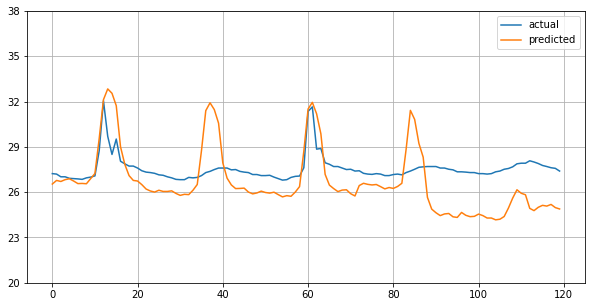

               temperature  predicted_temperature
part_of_day                                      
Afternoon        28.597500              30.122500
Early-Morning    27.014667              25.861333
Evening          27.794667              26.339333
Mid-Night        27.191500              25.949000
Morning          27.200400              26.357200
Night            27.496000              25.621200

TEMP RMSE : 1.3870511537604324


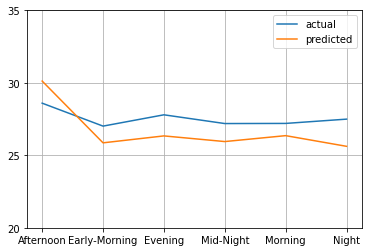

       temperature  predicted_temperature
hour                                     
00:00       27.284                 25.920
01:00       27.206                 26.008
02:00       27.148                 25.928
03:00       27.128                 25.940
04:00       27.066                 26.008
05:00       27.016                 25.864
06:00       26.962                 25.712
07:00       26.968                 25.762
08:00       27.086                 25.710
09:00       27.120                 25.926
10:00       27.160                 26.220
11:00       27.668                 28.168
12:00       29.156                 30.414
13:00       28.826                 30.738
14:00       28.084                 30.074
15:00       28.324                 29.264
16:00       27.876                 26.944
17:00       27.806                 26.182
18:00       27.702                 25.892
19:00       27.660                 25.728
20:00       27.576                 25.754
21:00       27.478                

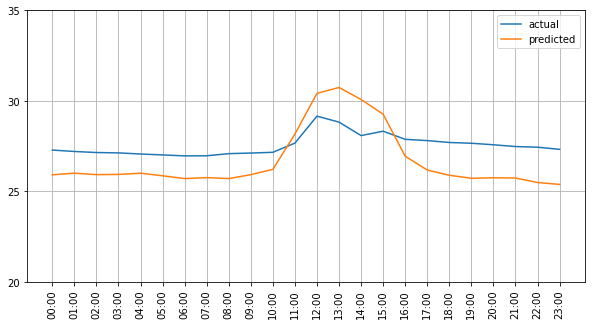

In [246]:
# ### Kodungaiyur

# kodungudi
eval_pod_mean = kod[['temperature','predicted_temperature']].groupby(kod.part_of_day).mean()
eval_hour_mean = kod[['temperature','predicted_temperature']].groupby(kod.hour).mean()

plt.figure(figsize=(10,5))
plt.plot(kod.index,kod.temperature,label='actual')
plt.plot(kod.index,kod.predicted_temperature,label='predicted')
plt.legend()
plt.yticks(np.arange(20,40,3))
plt.grid()
plt.show()

plt.plot(eval_pod_mean.index,eval_pod_mean.temperature,label='actual')
plt.plot(eval_pod_mean.index,eval_pod_mean.predicted_temperature,label='predicted')
plt.legend()
plt.yticks(np.arange(20,40,5))
plt.grid()
print(eval_pod_mean)
try:
    print('\nTEMP RMSE :', np.sqrt(mean_squared_error(eval_pod_mean.temperature,eval_pod_mean.predicted_temperature)))
except:    
    print('\nRMSE cannot be calculated as Null values are present. ')
plt.show()

plt.figure(figsize=(10,5))
plt.plot(eval_hour_mean.index,eval_hour_mean.temperature,label='actual')
plt.plot(eval_hour_mean.index,eval_hour_mean.predicted_temperature,label='predicted')
plt.legend()
plt.grid()
plt.xticks(rotation=90)
plt.yticks(np.arange(20,40,5))
print(eval_hour_mean)
try:
    print('\nTEMP RMSE :', np.sqrt(mean_squared_error(eval_hour_mean.temperature,eval_hour_mean.predicted_temperature)))
except:    
    print('\nRMSE cannot be calculated as Null values are present. ')
plt.show()

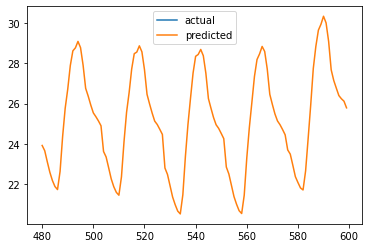

               temperature  predicted_temperature
part_of_day                                      
Afternoon              NaN              28.881500
Early-Morning          NaN              21.378667
Evening                NaN              26.984000
Mid-Night              NaN              22.752500
Morning                NaN              25.188800
Night                  NaN              25.261600

RMSE cannot be calculated as Null values are present. 


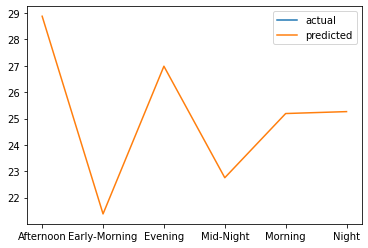

       temperature  predicted_temperature
hour                                     
00:00          NaN                 23.378
01:00          NaN                 23.096
02:00          NaN                 22.544
03:00          NaN                 21.992
04:00          NaN                 21.622
05:00          NaN                 21.324
06:00          NaN                 21.190
07:00          NaN                 22.114
08:00          NaN                 23.886
09:00          NaN                 25.410
10:00          NaN                 26.670
11:00          NaN                 27.864
12:00          NaN                 28.658
13:00          NaN                 28.836
14:00          NaN                 29.166
15:00          NaN                 28.866
16:00          NaN                 27.984
17:00          NaN                 26.722
18:00          NaN                 26.246
19:00          NaN                 25.806
20:00          NaN                 25.432
21:00          NaN                

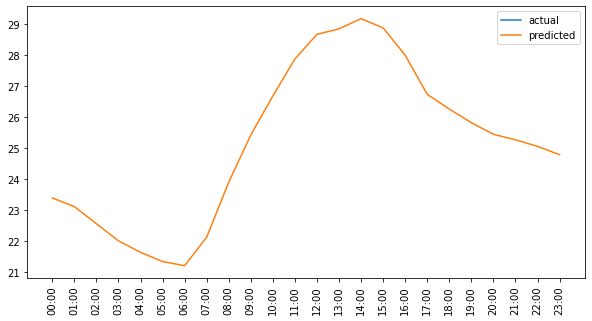

In [247]:
# ### Velacheri

eval_pod_mean = vel[['temperature','predicted_temperature']].groupby(vel.part_of_day).mean()
eval_hour_mean = vel[['temperature','predicted_temperature']].groupby(vel.hour).mean()

plt.plot(vel.index,vel.temperature,label='actual')
plt.plot(vel.index,vel.predicted_temperature,label='predicted')
plt.legend()
plt.show()

plt.plot(eval_pod_mean.index,eval_pod_mean.temperature,label='actual')
plt.plot(eval_pod_mean.index,eval_pod_mean.predicted_temperature,label='predicted')
plt.legend()
print(eval_pod_mean)
try:
    print('\nTEMP RMSE :', np.sqrt(mean_squared_error(eval_pod_mean.temperature,eval_hour_mean.predicted_temperature)))
except:    
    print('\nRMSE cannot be calculated as Null values are present. ')
plt.show()

plt.figure(figsize=(10,5))
plt.plot(eval_hour_mean.index,eval_hour_mean.temperature,label='actual')
plt.plot(eval_hour_mean.index,eval_hour_mean.predicted_temperature,label='predicted')
plt.legend()
plt.xticks(rotation=90)
print(eval_hour_mean)
try:
    print('\nTEMP RMSE :', np.sqrt(mean_squared_error(eval_hour_mean.temperature,eval_hour_mean.predicted_temperature)))
except:    
    print('\nRMSE cannot be calculated as Null values are present. ')
plt.show()

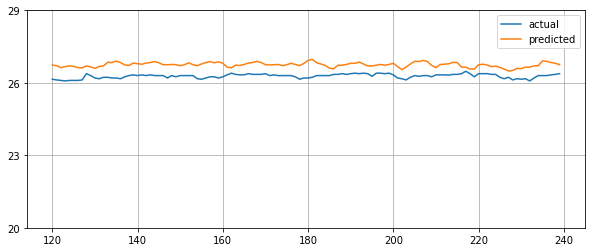

               temperature  predicted_temperature
part_of_day                                      
Afternoon        26.225000              26.802500
Early-Morning    26.293333              26.728667
Evening          26.274000              26.705333
Mid-Night        26.292500              26.733000
Morning          26.245600              26.696400
Night            26.341200              26.798400

TEMP RMSE : 0.46821692543014437


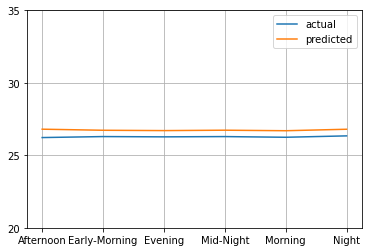

       temperature  predicted_temperature
hour                                     
00:00       26.312                 26.804
01:00       26.330                 26.762
02:00       26.308                 26.680
03:00       26.220                 26.686
04:00       26.302                 26.738
05:00       26.286                 26.744
06:00       26.292                 26.704
07:00       26.294                 26.710
08:00       26.332                 26.768
09:00       26.256                 26.696
10:00       26.172                 26.628
11:00       26.174                 26.680
12:00       26.196                 26.752
13:00       26.236                 26.838
14:00       26.234                 26.794
15:00       26.234                 26.826
16:00       26.220                 26.780
17:00       26.266                 26.684
18:00       26.336                 26.652
19:00       26.332                 26.790
20:00       26.328                 26.780
21:00       26.332                

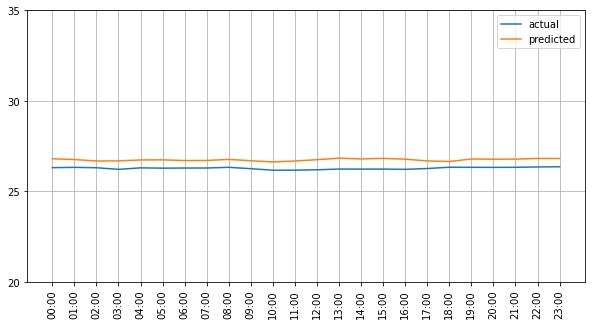

In [248]:
# ## Royapuram
eval_pod_mean = roy[['temperature','predicted_temperature']].groupby(roy.part_of_day).mean()
eval_hour_mean = roy[['temperature','predicted_temperature']].groupby(roy.hour).mean()

plt.figure(figsize=(10,4))
plt.plot(roy.index,roy.temperature,label='actual')
plt.plot(roy.index,roy.predicted_temperature,label='predicted')
plt.yticks(np.arange(20,30,3))
plt.legend()
plt.grid()
plt.show()

plt.plot(eval_pod_mean.index,eval_pod_mean.temperature,label='actual')
plt.plot(eval_pod_mean.index,eval_pod_mean.predicted_temperature,label='predicted')
plt.legend()
plt.yticks(np.arange(20,40,5))
plt.grid()
print(eval_pod_mean)
try:
    print('\nTEMP RMSE :', np.sqrt(mean_squared_error(eval_pod_mean.temperature,eval_pod_mean.predicted_temperature)))
except:    
    print('\nRMSE cannot be calculated as Null values are present. ')
plt.show()

plt.figure(figsize=(10,5))
plt.plot(eval_hour_mean.index,eval_hour_mean.temperature,label='actual')
plt.plot(eval_hour_mean.index,eval_hour_mean.predicted_temperature,label='predicted')
plt.legend()
plt.xticks(rotation=90)
plt.yticks(np.arange(20,40,5))
plt.grid()
print(eval_hour_mean)
try:
    print('\nTEMP RMSE :', np.sqrt(mean_squared_error(eval_hour_mean.temperature,eval_hour_mean.predicted_temperature)))
except:    
    print('\nRMSE cannot be calculated as Null values are present. ')
plt.show()